# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# first let us import all libraries we will use for EDA and modeling
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

pd.set_option("display.max_columns", None) # lets us view all columns

In [2]:
# lets bring in the data and preview the first few lines
df = pd.read_csv('INNHotelsGroup.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
# preview the first few lines
df.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

In [4]:
# lets look at the shape of the dataframe
df.shape

(36275, 19)

In [5]:
# lets look at the info behind each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# lets look at some statistical analysis for each of the pertinent variables
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

##### Insights:
- There are 36275 rows of data and 19 columns
- There are no inherently null values but we will have to dig further to check that all entries are valid entries
- There is some preprocessing to do before modeling with changing object type variables to integer variables such 0,1,2,3. Those columns include type_of_meal_plan, room_type_reserved, market_segment_type and booking_status
- booking_ID will be useless and thrown out for modeling purposes later on
- 2 adults seems to be a very common request on bookings
- children seem to not be typical for hotel stays based on the variable
- weekend nights skews left
- week nights skew right
- vast majority of people do not require a parking space
- lead time is very right skewed in its distribution
- arrival year seems unimportant to the study as it spans 2 years
- arrival months are left skewed, which makes sense with the holiday season
- arrival date seems to have a fairly normal distribution
- repreated guests seems to not be a frequent thing (one time traveler to city) could hint at no brand loyalty among hotel chains for consumers
- seems like there might be some outliers in the cancellation area
- same can be said for previous bookings not cancelled
- average room price looks to be normally distributed with a long right tail
- special requests seems to be right skewed some

Overall there is not much outlier treatment to be looked at. The data appears on first inspection to be pretty clean. We will have to do some diving into entry types for each column to make sure that is the case. 

In [7]:
df.sample(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
16016   INN16017             2               0                     1   
17399   INN17400             3               0                     0   
36061   INN36062             1               0                     0   
20149   INN20150             1               0                     1   
31779   INN31780             2               0                     2   
13767   INN13768             3               0                     2   
29876   INN29877             3               0                     0   
5804    INN05805             2               0                     0   
20776   INN20777             1               0                     1   
27198   INN27199             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
16016                  4       Meal Plan 2                           0   
17399                  3       Meal Plan 1                           0   
36061                  3       Meal Plan 1                           0   
20149                  0       Meal Plan 1                           0   
31779                  1       Meal Plan 2                           0   
13767                  1       Meal Plan 1                           0   
29876                  4       Meal Plan 1                           0   
5804                   2       Meal Plan 1                           0   
20776                  3       Meal Plan 1                           0   
27198                  2       Meal Plan 2                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
16016        Room_Type 1         35          2018             10   
17399        Room_Type 4         19          2018              6   
36061        Room_Type 1        105          2018             10   
20149        Room_Type 1         12          2018              9   
31779        Room_Type 1        138          2017              8   
13767        Room_Type 1        139          2018              5   
29876        Room_Type 4         43          2018             11   
5804         Room_Type 1        315          2018             12   
20776        Room_Type 1         83          2018              6   
27198        Room_Type 1        418          2018              9   

       arrival_date market_segment_type  repeated_guest  \
16016            31             Offline               0   
17399             2              Online               0   
36061            12             Offline               0   
20149            11             Offline               0   
31779            22             Offline               0   
13767            15              Online               0   
29876             1              Online               0   
5804              2             Offline               0   
20776            27              Online               0   
27198            26             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
16016                             0                                     0   
17399                             0                                     0   
36061                             0                                     0   
20149                             0                                     0   
31779                             0                                     0   
13767                             0                                     0   
29876                             0                                     0   
5804                              0                                     0   
20776                             0                                     0   
27198                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
16016              105.00                       0   Not_Canceled  
17399            

Even in the random sample, no missing value possibilities are popping out

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

no_of_adults value counts
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
2    71.97
1    21.21
3     6.39
0     0.38
4     0.04
Name: no_of_adults, dtype: float64


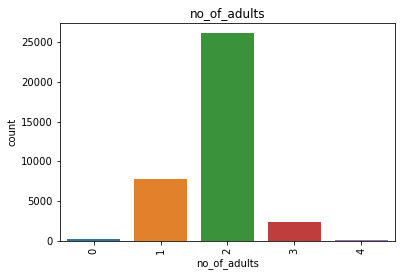

no_of_children value counts
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
0     92.56
1      4.46
2      2.92
3      0.05
9      0.01
10     0.00
Name: no_of_children, dtype: float64


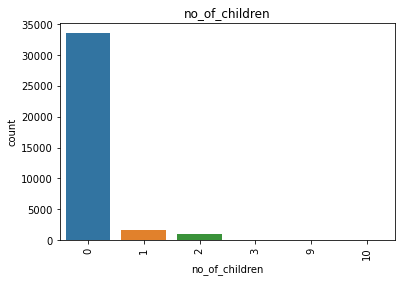

no_of_weekend_nights value counts
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
0    46.51
1    27.55
2    25.01
3     0.42
4     0.36
5     0.09
6     0.06
7     0.00
Name: no_of_weekend_nights, dtype: float64


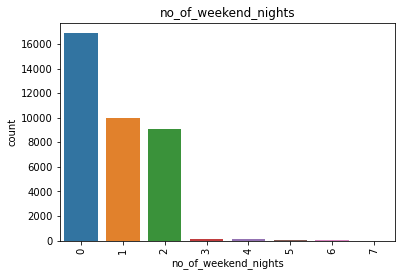

no_of_week_nights value counts
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
2     31.55
1     26.16
3     21.61
4      8.24
0      6.58
5      4.45
6      0.52
7      0.31
10     0.17
8      0.17
9      0.09
11     0.05
15     0.03
12     0.02
14     0.02
13     0.01
17     0.01
16     0.01
Name: no_of_week_nights, dtype: float64


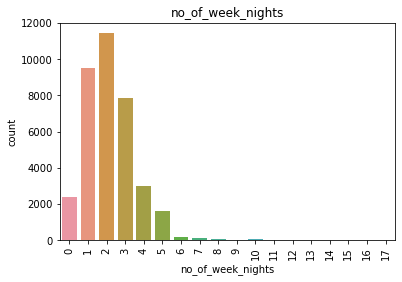

type_of_meal_plan value counts
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Meal Plan 1     76.73
Not Selected    14.14
Meal Plan 2      9.11
Meal Plan 3      0.01
Name: type_of_meal_plan, dtype: float64


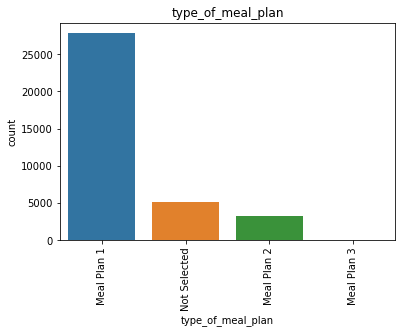

required_car_parking_space value counts
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
0    96.9
1     3.1
Name: required_car_parking_space, dtype: float64


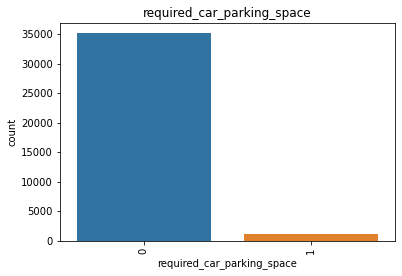

room_type_reserved value counts
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Room_Type 1    77.55
Room_Type 4    16.70
Room_Type 6     2.66
Room_Type 2     1.91
Room_Type 5     0.73
Room_Type 7     0.44
Room_Type 3     0.02
Name: room_type_reserved, dtype: float64


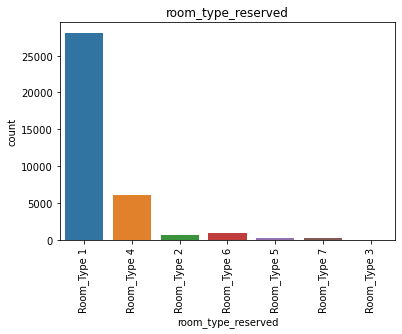

arrival_year value counts
2018    29761
2017     6514
Name: arrival_year, dtype: int64
2018    82.04
2017    17.96
Name: arrival_year, dtype: float64


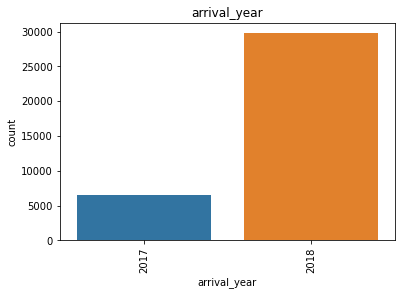

arrival_month value counts
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64
10    14.66
9     12.71
8     10.51
6      8.83
12     8.33
11     8.22
7      8.05
4      7.54
5      7.16
3      6.50
2      4.70
1      2.80
Name: arrival_month, dtype: float64


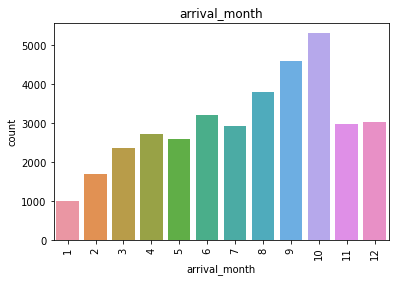

arrival_date value counts
13    1358
17    1345
2     1331
19    1327
4     1327
16    1306
20    1281
6     1273
15    1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64
13    3.74
17    3.71
2     3.67
19    3.66
4     3.66
16    3.60
20    3.53
6     3.51
15    3.51
18    3.47
14    3.42
30    3.35
12    3.32
8     3.30
29    3.28
21    3.19
5     3.18
26    3.16
25    3.16
1     3.12
9     3.12
28    3.11
7     3.06
24    3.04
11    3.03
3     3.03
10    3.00
27    2.92
22    2.82
23    2.73
31    1.59
Name: arrival_date, dtype: float64


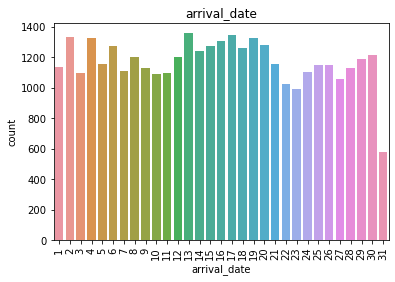

market_segment_type value counts
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Online           63.99
Offline          29.02
Corporate         5.56
Complementary     1.08
Aviation          0.34
Name: market_segment_type, dtype: float64


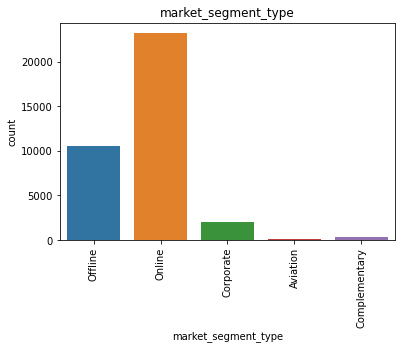

repeated_guest value counts
0    35345
1      930
Name: repeated_guest, dtype: int64
0    97.44
1     2.56
Name: repeated_guest, dtype: float64


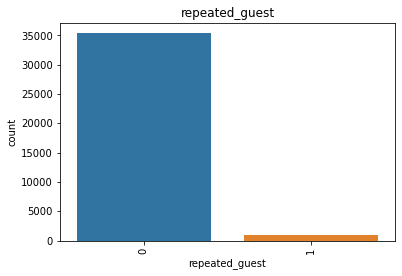

no_of_previous_cancellations value counts
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64
0     99.07
1      0.55
2      0.13
3      0.12
11     0.07
5      0.03
4      0.03
13     0.01
6      0.00
Name: no_of_previous_cancellations, dtype: float64


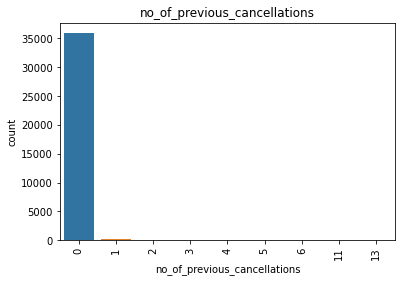

no_of_previous_bookings_not_canceled value counts
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
13        7
16        7
20        6
17        6
18        6
19        6
22        6
21        6
27        3
23        3
24        3
25        3
28        2
30        2
29        2
26        2
48        2
31        2
44        2
32        2
47        1
55        1
33        1
34        1
35        1
36        1
58        1
37        1
57        1
38        1
56        1
39        1
40        1
54        1
41        1
53        1
42        1
52        1
43        1
51        1
50        1
45        1
49        1
46        1
Name: no_of_previous_bookings_not_canceled, dtype: int64
0     97.76
1      0.63
2      0.31
3      0.22
4      0.18
5      0.17
6      0.10
7      0.07
8      0.06
10     0.05
9      0.05
11     0.04
12     0.03
14     0.02
15     0.02
13   

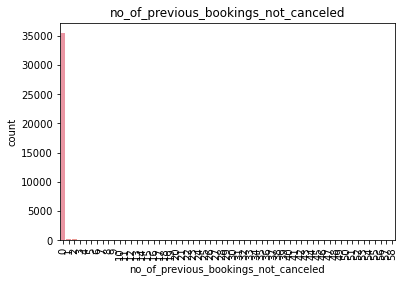

no_of_special_requests value counts
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64
0    54.52
1    31.35
2    12.03
3     1.86
4     0.22
5     0.02
Name: no_of_special_requests, dtype: float64


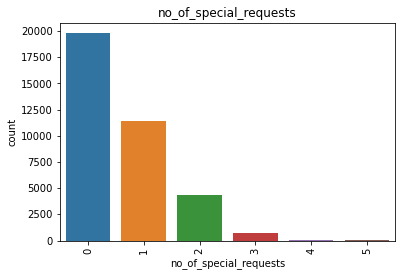

booking_status value counts
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
Not_Canceled    67.24
Canceled        32.76
Name: booking_status, dtype: float64


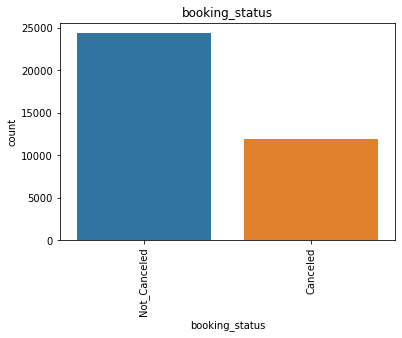

In [8]:
# lets start by looping through almost all discrete columns with a histogram
# we are not including booking_ID as it does not matter for modeling purposes
cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 
        'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date', 
        'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
        'no_of_special_requests', 'booking_status']

# lets now loop through a process to graph all of these to a histogram and show value counts
for colname in cols:
    # show value counts of each variable
    print('{} value counts'.format(colname))
    print(df[colname].value_counts())
    print(round(df[colname].value_counts(normalize=True)*100,2)) # shows the percentage rounded to 2 decimal places
    # plot each variables
    sns.countplot(data = df, x = colname)
    plt.title('{}'.format(colname))
    plt.xticks(rotation=90) # rotate labals 90 degrees
    plt.show()

##### Insights:
- 2 adults is clearly the most common results with almost 72% of entries accounting for it
- Children are clearly not the go to for hotel booking, may be some business strategy here
- no weekend nights booked is almost a majority of the entries with 46.5%, followed by a close second/third race of 1 and 2 nights. it could be said that a majority of bookings had at least 1 night on the weekend booked
- number of week nights has a fairly normal looking distribution with a long right tail
- over 76% of bookings only wanted breakfast included with their booking (could reduce costs to only have breakfast available if less than 25% of guests are taking advantage of more meals.
- almost 97% of bookings did not require a parking space
- Room type 1 is clearly the favorite. Between type 1 and type 4, they account for over 94% of bookings
- Most entires occured in 2018, will throw out this variable as it does not matter for modeling purposes
- October (month 10) was the most popular month to book a hotel
- Arrival data seems to have a very uniform distribution (considering month dates available like 31)
- Online is clearly the most popular market segment. Offline is clearly second place with Corporate being a very distant third.
- Over 97.4% of guests are not repeat guests. That seems to be a very large issue
- Over 99% of people have 0 cancellations before this booking
- over 97% of people have not cancelled a booking before. These two columns may have some redundancy 
- over 54% of bookings had 0 special requests
- Over 67% of bookings were not cancelled from these entries. Which leaves us with just under 33% of bookings being cancelled from the entries given.

From the univariate analysis we can see that (from these columns at least) we do not have a missing, but not null, data issue. There could be some redundancy two of the columns, that will be investigated in the bi-variate analysis.

lead_time value counts
0      1297
1      1078
2       643
3       630
4       628
       ... 
324       1
325       1
348       1
328       1
351       1
Name: lead_time, Length: 352, dtype: int64
0      3.58
1      2.97
2      1.77
3      1.74
4      1.73
       ... 
324    0.00
325    0.00
348    0.00
328    0.00
351    0.00
Name: lead_time, Length: 352, dtype: float64


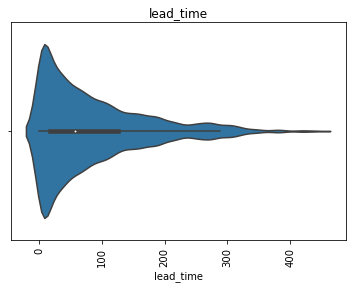

avg_price_per_room value counts
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
139.88      1
82.59       1
126.69      1
108.35      1
178.33      1
Name: avg_price_per_room, Length: 3930, dtype: int64
65.00     2.34
75.00     2.28
90.00     1.94
95.00     1.84
115.00    1.82
          ... 
139.88    0.00
82.59     0.00
126.69    0.00
108.35    0.00
178.33    0.00
Name: avg_price_per_room, Length: 3930, dtype: float64


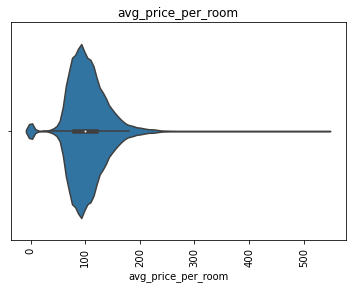

In [9]:
# lets now check out the final two variables of concern
cols2 = ['lead_time', 'avg_price_per_room']

for colname in cols2:
    # show value counts of each variable
    print('{} value counts'.format(colname))
    print(df[colname].value_counts())
    print(round(df[colname].value_counts(normalize=True)*100,2)) # shows the percentage rounded to 2 decimal places
    # plot each variables
    sns.violinplot(data = df, x = colname)
    plt.title('{}'.format(colname))
    plt.xticks(rotation=90) # rotate labals 90 degrees
    plt.show()

##### Insights:
- lead_time definitely skews right. It seems people prefer to book hotels closer to the time of the stay
- avergae price seems to have some free-almost free rooms. These could be complimentary rooms given for a variety of reasons. If you take out those, there seems to be a fairly normal distribution with just a very long skinny right tail.

### Bi-Variate Analysis

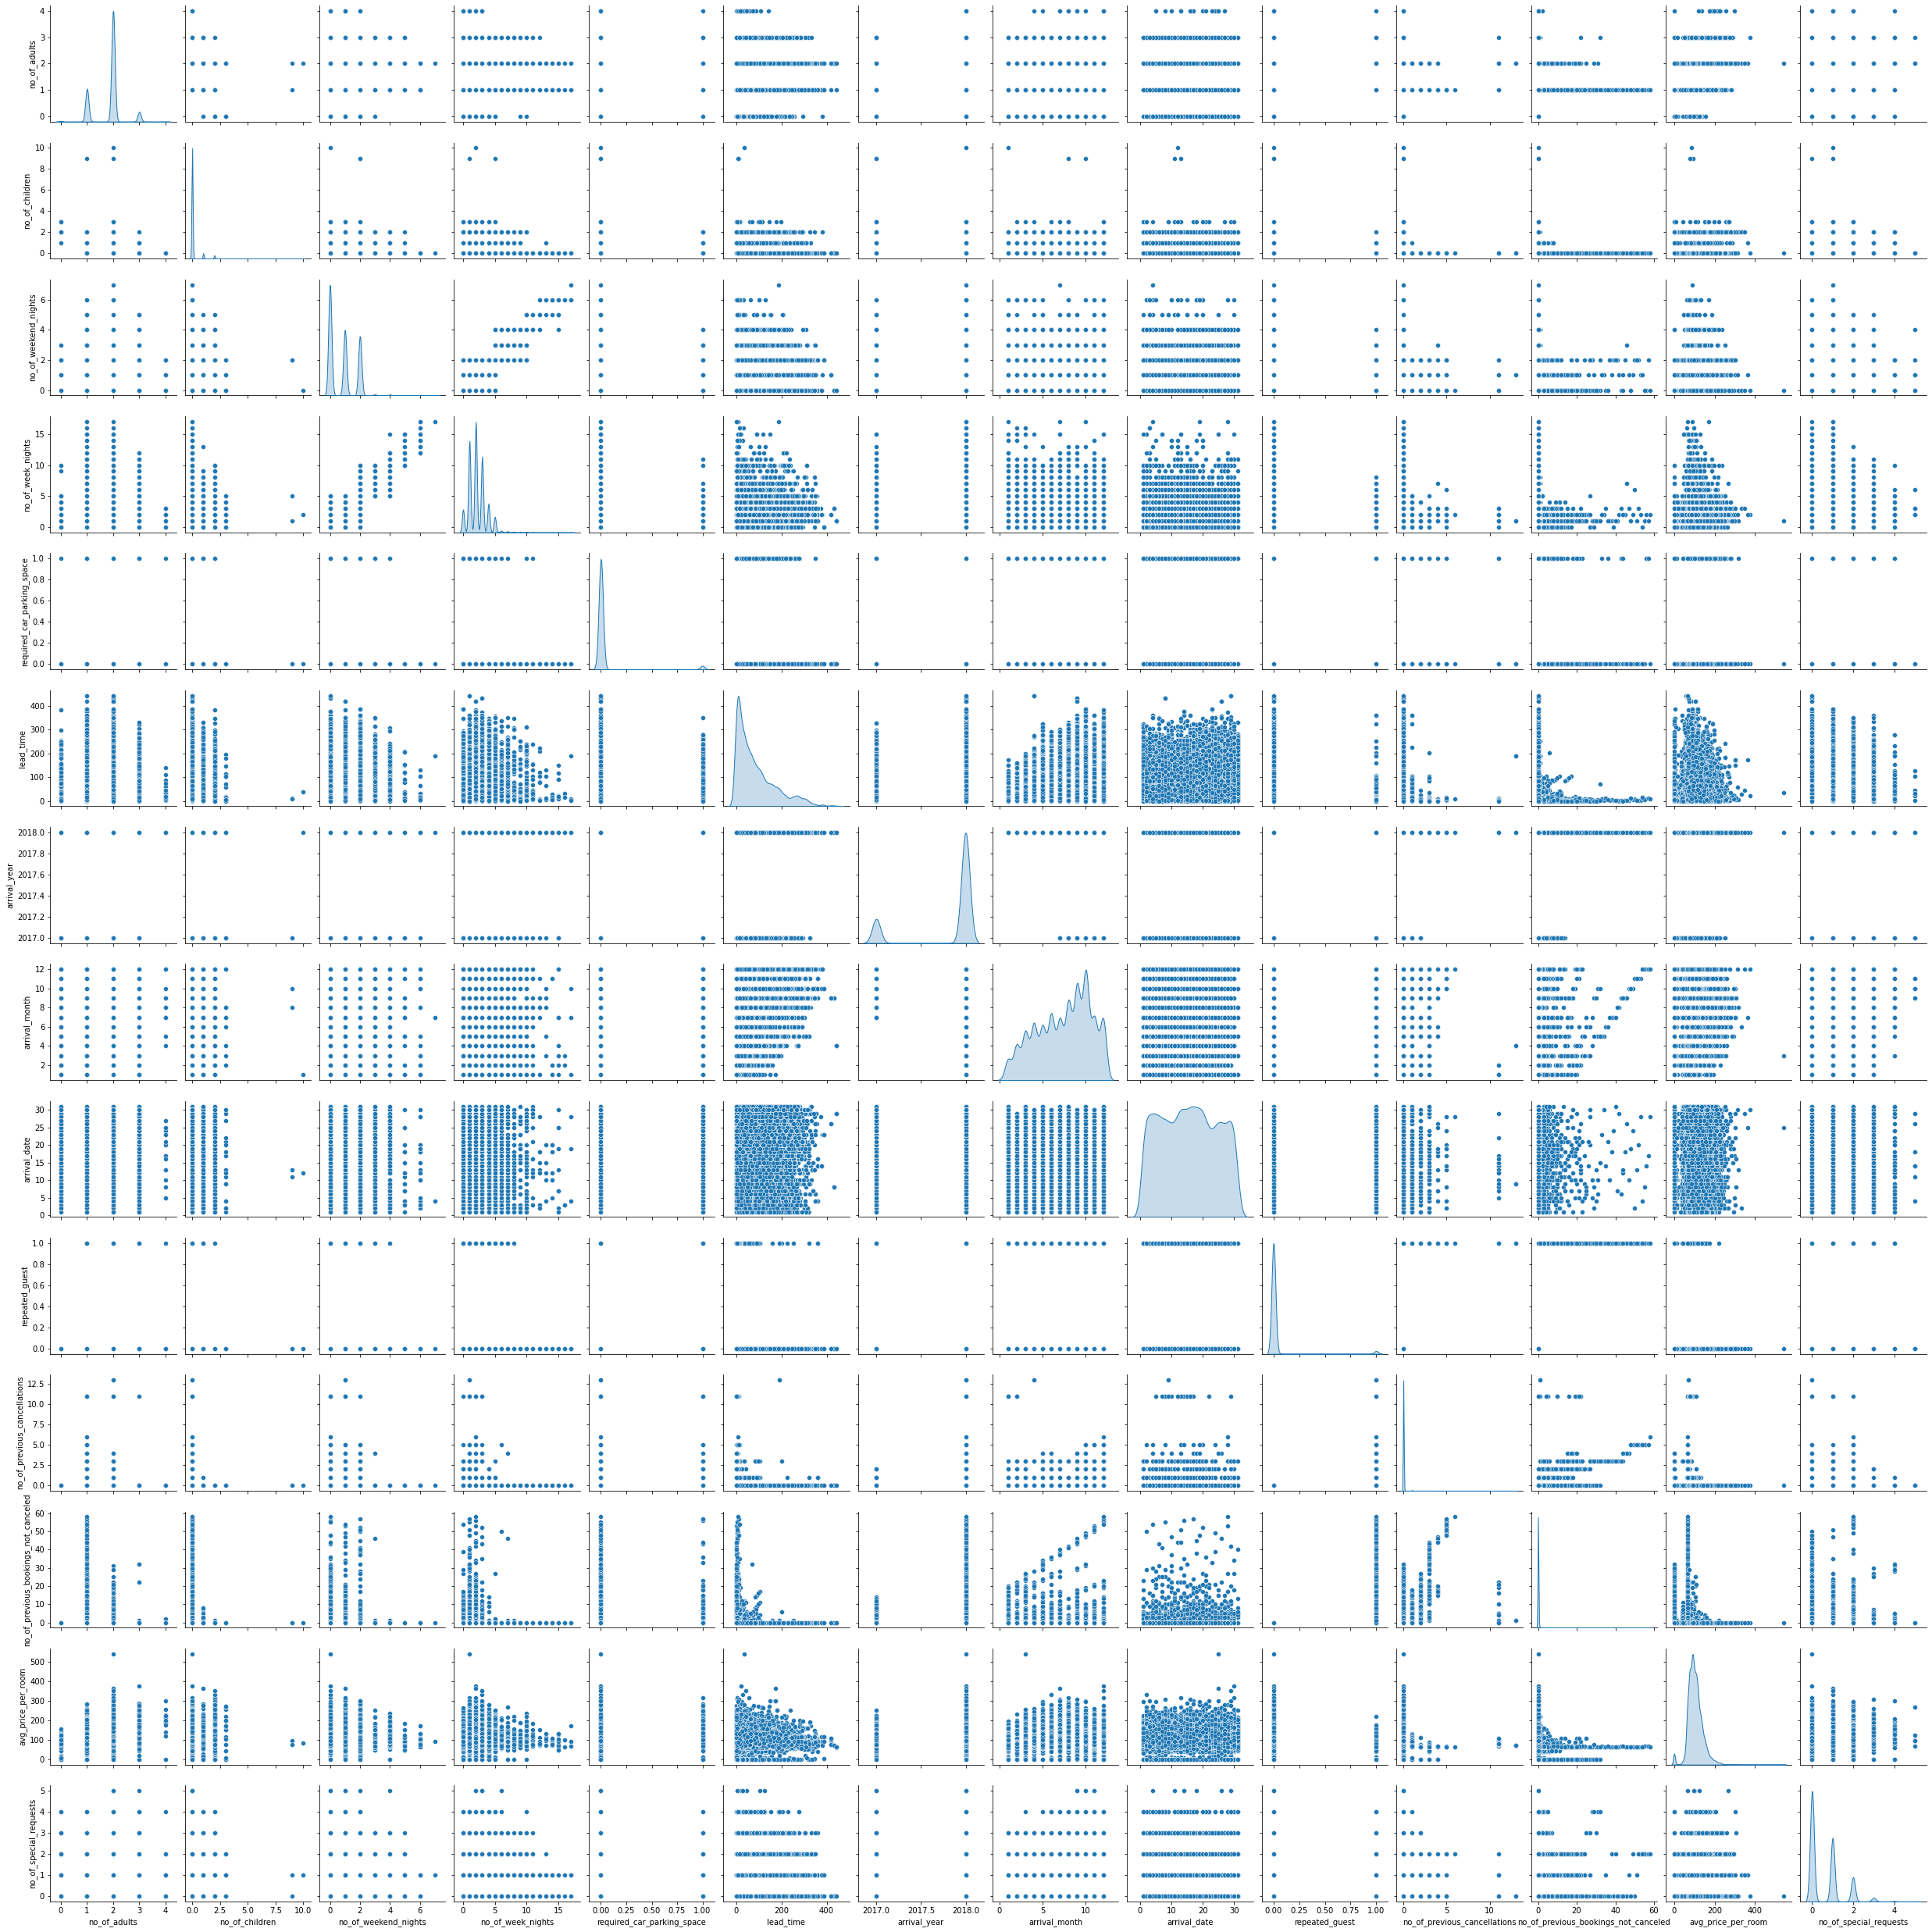

In [10]:
# a pairplot is a good place to start with bi-variate analysis
sns.pairplot(df,diag_kind='kde')

##### Insights:
Since so many of the variables were discrete style variables, not much insight was able to be drawn from the pairplots. A different approach will need to be taken.


<AxesSubplot:>

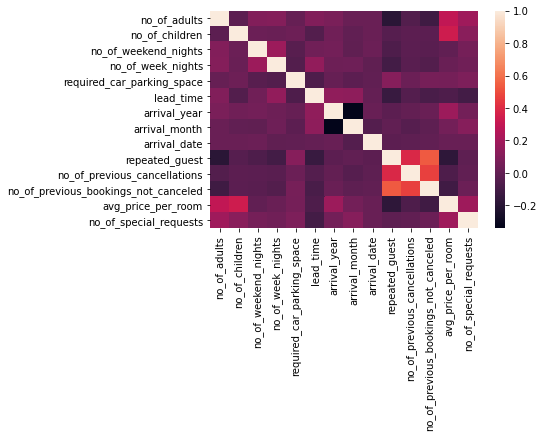

In [11]:
# lets use another common bi_variate numerical analysis methodology
# creating a correaltion heat chart
# first create a variable that is the correlation of the dataframe
hotel_corr = df.corr()

#then graph results
sns.heatmap(hotel_corr)

##### Insight:
- Avg room price and number of adults/children seems to have some moderate correlation (to be expected)
- Number of previous cancellations and repeated guests seems to have some moderate correlation
- Number of previous booking without a cancellation and repeated guests also seems to have some moderately high correlation
- Number of previous booking without a cancellation and Number of previous cancellations seems to have some moderate correlation as well

no_of_adults value counts
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
2    71.97
1    21.21
3     6.39
0     0.38
4     0.04
Name: no_of_adults, dtype: float64


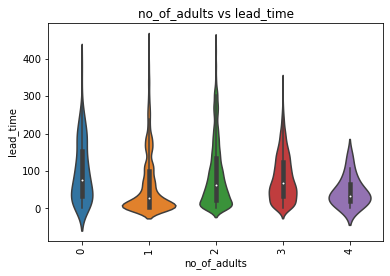

no_of_children value counts
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
0     92.56
1      4.46
2      2.92
3      0.05
9      0.01
10     0.00
Name: no_of_children, dtype: float64


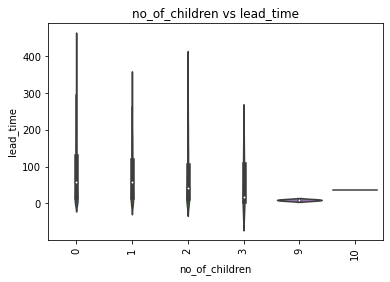

no_of_weekend_nights value counts
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
0    46.51
1    27.55
2    25.01
3     0.42
4     0.36
5     0.09
6     0.06
7     0.00
Name: no_of_weekend_nights, dtype: float64


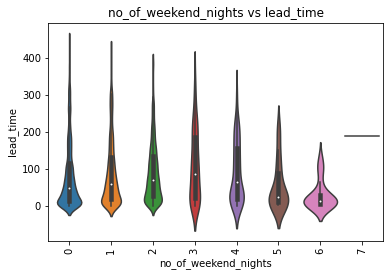

no_of_week_nights value counts
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
2     31.55
1     26.16
3     21.61
4      8.24
0      6.58
5      4.45
6      0.52
7      0.31
10     0.17
8      0.17
9      0.09
11     0.05
15     0.03
12     0.02
14     0.02
13     0.01
17     0.01
16     0.01
Name: no_of_week_nights, dtype: float64


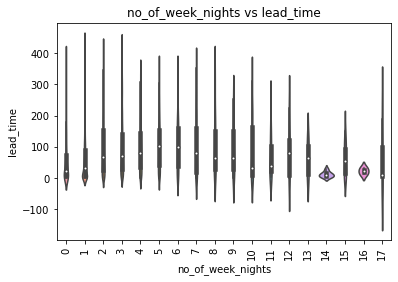

type_of_meal_plan value counts
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Meal Plan 1     76.73
Not Selected    14.14
Meal Plan 2      9.11
Meal Plan 3      0.01
Name: type_of_meal_plan, dtype: float64


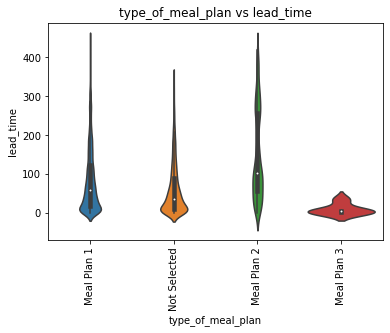

required_car_parking_space value counts
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
0    96.9
1     3.1
Name: required_car_parking_space, dtype: float64


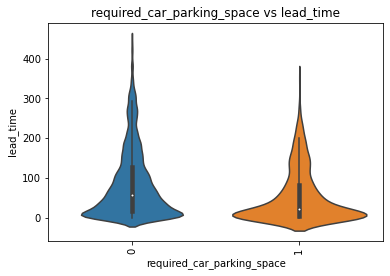

room_type_reserved value counts
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Room_Type 1    77.55
Room_Type 4    16.70
Room_Type 6     2.66
Room_Type 2     1.91
Room_Type 5     0.73
Room_Type 7     0.44
Room_Type 3     0.02
Name: room_type_reserved, dtype: float64


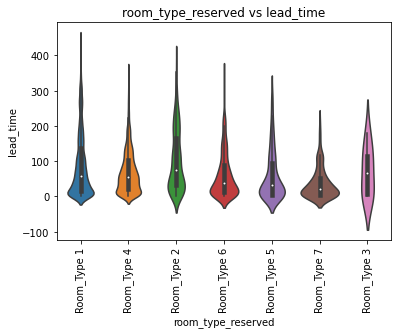

arrival_year value counts
2018    29761
2017     6514
Name: arrival_year, dtype: int64
2018    82.04
2017    17.96
Name: arrival_year, dtype: float64


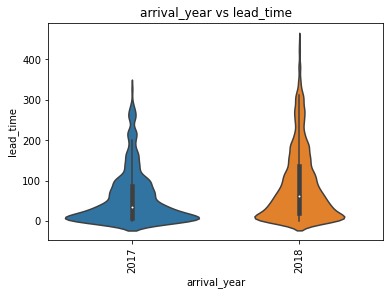

arrival_month value counts
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64
10    14.66
9     12.71
8     10.51
6      8.83
12     8.33
11     8.22
7      8.05
4      7.54
5      7.16
3      6.50
2      4.70
1      2.80
Name: arrival_month, dtype: float64


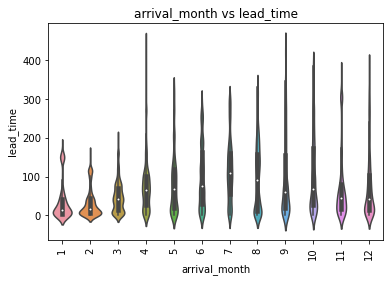

arrival_date value counts
13    1358
17    1345
2     1331
19    1327
4     1327
16    1306
20    1281
6     1273
15    1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64
13    3.74
17    3.71
2     3.67
19    3.66
4     3.66
16    3.60
20    3.53
6     3.51
15    3.51
18    3.47
14    3.42
30    3.35
12    3.32
8     3.30
29    3.28
21    3.19
5     3.18
26    3.16
25    3.16
1     3.12
9     3.12
28    3.11
7     3.06
24    3.04
11    3.03
3     3.03
10    3.00
27    2.92
22    2.82
23    2.73
31    1.59
Name: arrival_date, dtype: float64


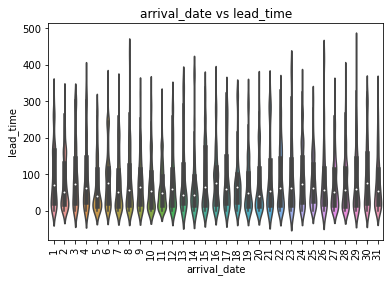

market_segment_type value counts
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Online           63.99
Offline          29.02
Corporate         5.56
Complementary     1.08
Aviation          0.34
Name: market_segment_type, dtype: float64


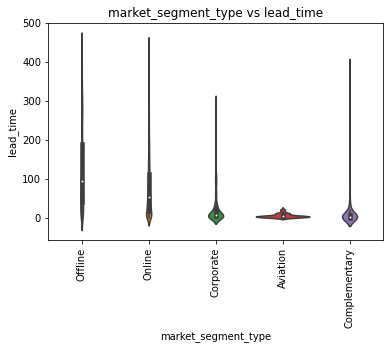

repeated_guest value counts
0    35345
1      930
Name: repeated_guest, dtype: int64
0    97.44
1     2.56
Name: repeated_guest, dtype: float64


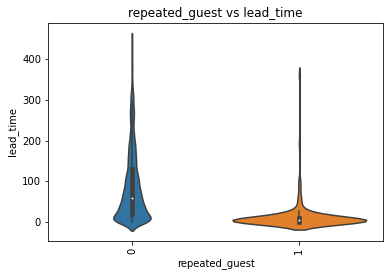

no_of_previous_cancellations value counts
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64
0     99.07
1      0.55
2      0.13
3      0.12
11     0.07
5      0.03
4      0.03
13     0.01
6      0.00
Name: no_of_previous_cancellations, dtype: float64


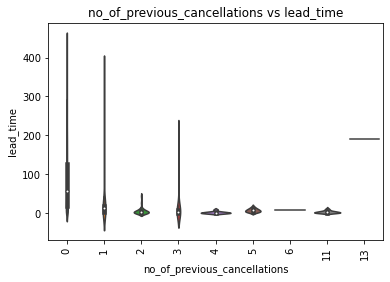

no_of_previous_bookings_not_canceled value counts
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
13        7
16        7
20        6
17        6
18        6
19        6
22        6
21        6
27        3
23        3
24        3
25        3
28        2
30        2
29        2
26        2
48        2
31        2
44        2
32        2
47        1
55        1
33        1
34        1
35        1
36        1
58        1
37        1
57        1
38        1
56        1
39        1
40        1
54        1
41        1
53        1
42        1
52        1
43        1
51        1
50        1
45        1
49        1
46        1
Name: no_of_previous_bookings_not_canceled, dtype: int64
0     97.76
1      0.63
2      0.31
3      0.22
4      0.18
5      0.17
6      0.10
7      0.07
8      0.06
10     0.05
9      0.05
11     0.04
12     0.03
14     0.02
15     0.02
13   

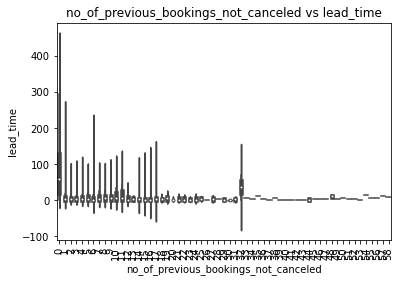

no_of_special_requests value counts
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64
0    54.52
1    31.35
2    12.03
3     1.86
4     0.22
5     0.02
Name: no_of_special_requests, dtype: float64


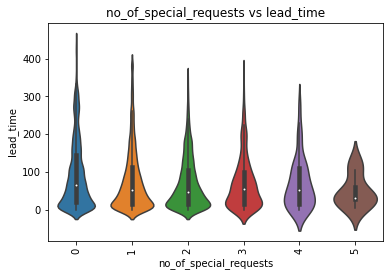

booking_status value counts
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
Not_Canceled    67.24
Canceled        32.76
Name: booking_status, dtype: float64


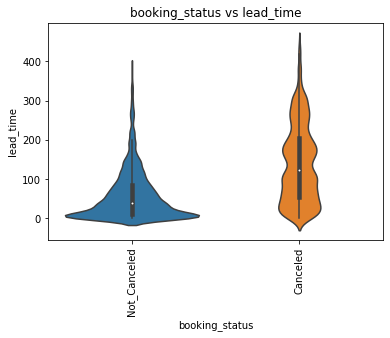

no_of_adults value counts
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
2    71.97
1    21.21
3     6.39
0     0.38
4     0.04
Name: no_of_adults, dtype: float64


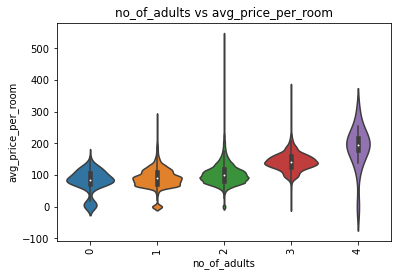

no_of_children value counts
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
0     92.56
1      4.46
2      2.92
3      0.05
9      0.01
10     0.00
Name: no_of_children, dtype: float64


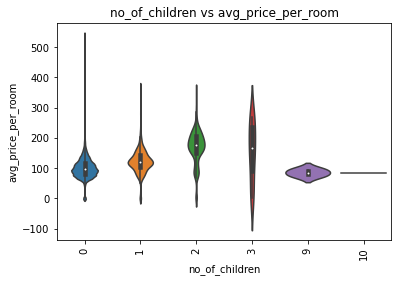

no_of_weekend_nights value counts
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
0    46.51
1    27.55
2    25.01
3     0.42
4     0.36
5     0.09
6     0.06
7     0.00
Name: no_of_weekend_nights, dtype: float64


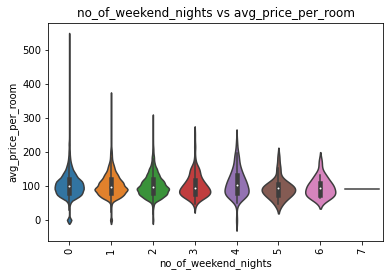

no_of_week_nights value counts
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
2     31.55
1     26.16
3     21.61
4      8.24
0      6.58
5      4.45
6      0.52
7      0.31
10     0.17
8      0.17
9      0.09
11     0.05
15     0.03
12     0.02
14     0.02
13     0.01
17     0.01
16     0.01
Name: no_of_week_nights, dtype: float64


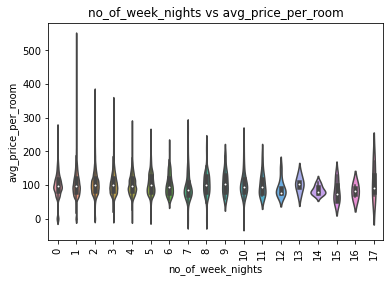

type_of_meal_plan value counts
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Meal Plan 1     76.73
Not Selected    14.14
Meal Plan 2      9.11
Meal Plan 3      0.01
Name: type_of_meal_plan, dtype: float64


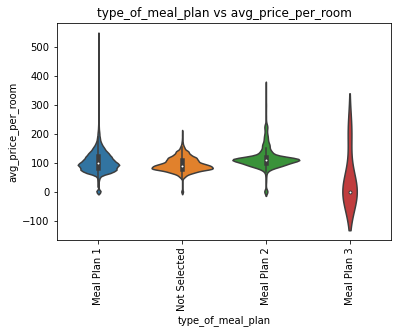

required_car_parking_space value counts
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
0    96.9
1     3.1
Name: required_car_parking_space, dtype: float64


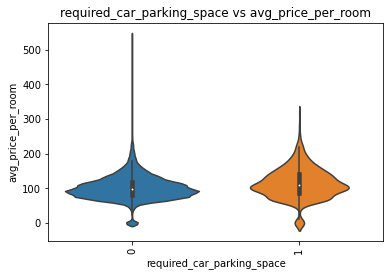

room_type_reserved value counts
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Room_Type 1    77.55
Room_Type 4    16.70
Room_Type 6     2.66
Room_Type 2     1.91
Room_Type 5     0.73
Room_Type 7     0.44
Room_Type 3     0.02
Name: room_type_reserved, dtype: float64


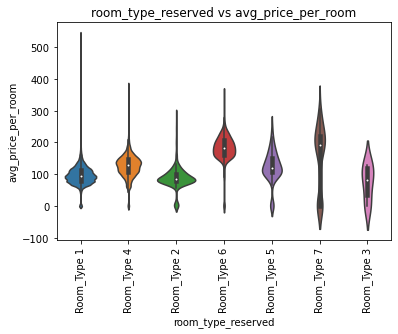

arrival_year value counts
2018    29761
2017     6514
Name: arrival_year, dtype: int64
2018    82.04
2017    17.96
Name: arrival_year, dtype: float64


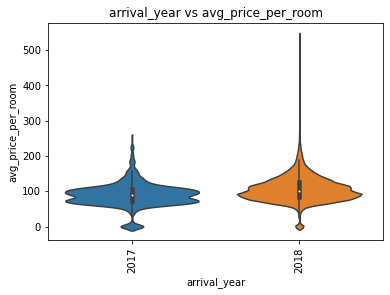

arrival_month value counts
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64
10    14.66
9     12.71
8     10.51
6      8.83
12     8.33
11     8.22
7      8.05
4      7.54
5      7.16
3      6.50
2      4.70
1      2.80
Name: arrival_month, dtype: float64


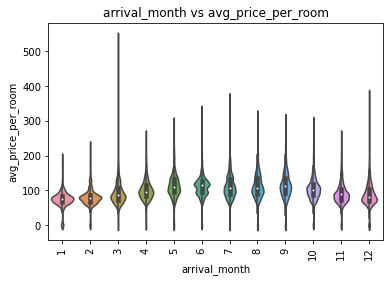

arrival_date value counts
13    1358
17    1345
2     1331
19    1327
4     1327
16    1306
20    1281
6     1273
15    1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64
13    3.74
17    3.71
2     3.67
19    3.66
4     3.66
16    3.60
20    3.53
6     3.51
15    3.51
18    3.47
14    3.42
30    3.35
12    3.32
8     3.30
29    3.28
21    3.19
5     3.18
26    3.16
25    3.16
1     3.12
9     3.12
28    3.11
7     3.06
24    3.04
11    3.03
3     3.03
10    3.00
27    2.92
22    2.82
23    2.73
31    1.59
Name: arrival_date, dtype: float64


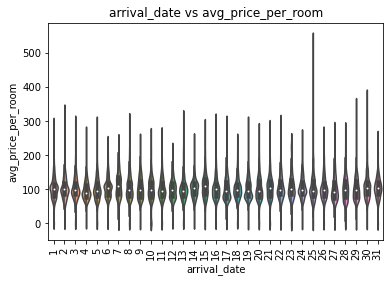

market_segment_type value counts
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Online           63.99
Offline          29.02
Corporate         5.56
Complementary     1.08
Aviation          0.34
Name: market_segment_type, dtype: float64


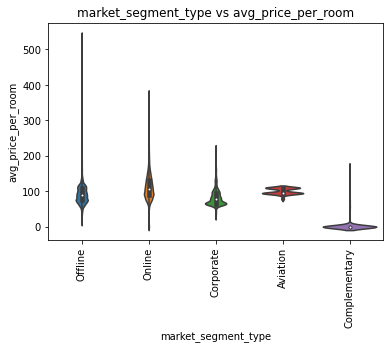

repeated_guest value counts
0    35345
1      930
Name: repeated_guest, dtype: int64
0    97.44
1     2.56
Name: repeated_guest, dtype: float64


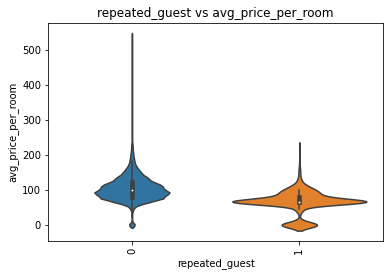

no_of_previous_cancellations value counts
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64
0     99.07
1      0.55
2      0.13
3      0.12
11     0.07
5      0.03
4      0.03
13     0.01
6      0.00
Name: no_of_previous_cancellations, dtype: float64


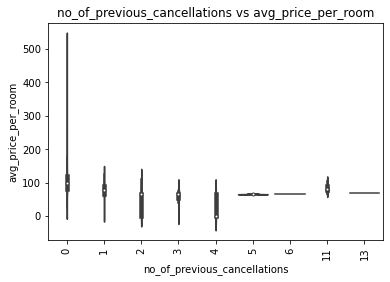

no_of_previous_bookings_not_canceled value counts
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
13        7
16        7
20        6
17        6
18        6
19        6
22        6
21        6
27        3
23        3
24        3
25        3
28        2
30        2
29        2
26        2
48        2
31        2
44        2
32        2
47        1
55        1
33        1
34        1
35        1
36        1
58        1
37        1
57        1
38        1
56        1
39        1
40        1
54        1
41        1
53        1
42        1
52        1
43        1
51        1
50        1
45        1
49        1
46        1
Name: no_of_previous_bookings_not_canceled, dtype: int64
0     97.76
1      0.63
2      0.31
3      0.22
4      0.18
5      0.17
6      0.10
7      0.07
8      0.06
10     0.05
9      0.05
11     0.04
12     0.03
14     0.02
15     0.02
13   

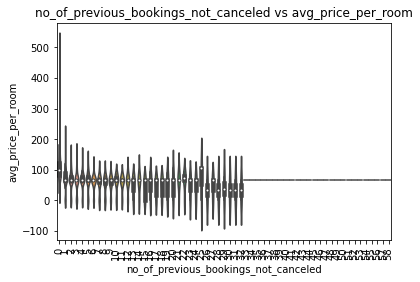

no_of_special_requests value counts
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64
0    54.52
1    31.35
2    12.03
3     1.86
4     0.22
5     0.02
Name: no_of_special_requests, dtype: float64


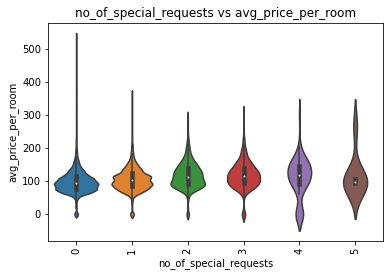

booking_status value counts
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
Not_Canceled    67.24
Canceled        32.76
Name: booking_status, dtype: float64


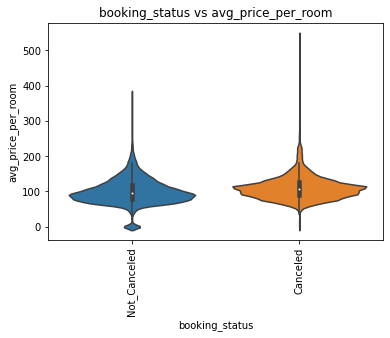

In [12]:
# lets look at the cols vs cols2
# this embedded for loop will generate a lot of graphs but should give us more insight
for colname2 in cols2:
    for colname in cols:
        print('{} value counts'.format(colname))
        print(df[colname].value_counts())
        print(round(df[colname].value_counts(normalize=True)*100,2)) # shows the percentage rounded to 2 decimal places
        sns.violinplot(data = df, x = colname, y = colname2)
        plt.title('{} vs {}'.format(colname, colname2))
        plt.xticks(rotation=90) # rotate labals 90 degrees
        plt.show()

##### Insights:
- Even with increased lead time, the types of meal plans chose does not deviate that much
- April and Septmeber bookings had more lead time range than any other months, could be popular vacation time so people feel the need to book further in advance
- Aviation has the most dense entries with the fewest lead times
- Repeated guests tend to have smaller lead times
- Entries that were cancelled had more uniform distribution than entries that were not cancelled
- When the number of adults goes above 3, the average price per room goes up 
- The number of weekend nights does not seem to effect the average price per room, which is curious because over 53% of entries had at least one night on the weekend. Dynamic pricing needs to do more on a weekday vs weekend?
- Price per room does not seem to matter too much (unless it was complimentary room) to meal plan chosen
- The most popular type of room had a large range but a condensed density for avg price per room
- Average price per room over $ 300 may need to be investigated for outliers
- Repeated guests get the highest density of complimentary rooms
- Special requests has sa negligible effect on price per room
- The booking status does not seem to have an effect on average price per room

<AxesSubplot:xlabel='lead_time', ylabel='avg_price_per_room'>

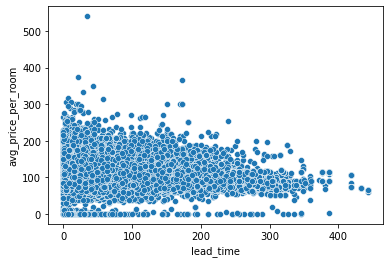

In [13]:
# lets check price vs lead time
sns.scatterplot(data=df, x = 'lead_time', y = 'avg_price_per_room')

##### Insights:
There does not seem to be any discernable patterns emerging from these two variables. However we can see that we may need to look at the one outlier of the price.

## Data Preprocessing

- Missing value treatment (if needed) - not needed
- Feature engineering (if needed) - not needed
- Outlier detection and treatment (if needed) - check
- Preparing data for modeling - check
- Any other preprocessing steps (if needed)

In [14]:
# lets first handle type of meal plan
# there are 4 options, we want to change them to 0,1,2,3 in our data
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1,
                                                      'Meal Plan 2': 2,'Meal Plan 3': 3})
df.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  2                  1                           0   
1                  3                  0                           0   
2                  1                  1                           0   
3                  2                  1                           0   
4                  1                  0                           0   
5                  2                  2                           0   
6                  3                  1                           0   
7                  3                  1                           0   
8                  4                  1                           0   
9                  5                  1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2      

In [15]:
# lets do a very similar process for room_type_reserved
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 
                                                      'Room_Type 4': 4,'Room_Type 5': 5, 'Room_Type 6': 6, 
                                                         'Room_Type 7': 7})
df.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  2                  1                           0   
1                  3                  0                           0   
2                  1                  1                           0   
3                  2                  1                           0   
4                  1                  0                           0   
5                  2                  2                           0   
6                  3                  1                           0   
7                  3                  1                           0   
8                  4                  1                           0   
9                  5                  1                           0   

   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                   1        224          2017             10             2   
1                   1          5          2018             11             6   
2                   1          1          2018              2            28   
3                   1        211          2018              5            20   
4                   1         48          2018              4            11   
5                   1        346          2018              9            13   
6                   1         34          2017             10            15   
7                   4         83          2018             12            26   
8                   1        121          2018              7             6   
9                   4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Cancele

In [16]:
# lets check that those two columns are changed to numerical data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  int64  
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

##### Insight:
We successfully chnaged them to a numerical data type, from object, and changed their values to be more easily read by our models.

In [17]:
# lets now one-hot encode the market segment type
df = pd.get_dummies(df, columns = ['market_segment_type'])
df.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  2                  1                           0   
1                  3                  0                           0   
2                  1                  1                           0   
3                  2                  1                           0   
4                  1                  0                           0   
5                  2                  2                           0   
6                  3                  1                           0   
7                  3                  1                           0   
8                  4                  1                           0   
9                  5                  1                           0   

   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                   1        224          2017             10             2   
1                   1          5          2018             11             6   
2                   1          1          2018              2            28   
3                   1        211          2018              5            20   
4                   1         48          2018              4            11   
5                   1        346          2018              9            13   
6                   1         34          2017             10            15   
7                   4         83          2018             12            26   
8                   1        121          2018              7             6   
9                   4         44          2018             10            18   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  market_segment_type_Aviation  \
0                       0   Not_Canceled                             0   
1                       1   Not_Canceled                             0   
2                       0       Canceled                             0   
3                       0       Canceled         

##### Insights:
We have successfully created 5 new columns that denote what market segment the entry took place in. We could have replaced the column with a simple numerical system, but , unlike the other columns, the numbers would not have been as intuitive here as the others.

In [18]:
# lets now look at the lone outlier we identified earlier with price
df[df['avg_price_per_room'] > 400]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
33114   INN33115             2               0                     0   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
33114                  1                  1                           0   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
33114                   1         35          2018              3   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
33114            25               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0               540.0   

       no_of_special_requests booking_status  market_segment_type_Aviation  \
33114                       0       Canceled                             0   

       market_segment_type_Complementary  market_segment_type_Corporate  \
33114                                  0                              0   

       market_segment_type_Offline  market_segment_type_Online  
33114                            1                           0

540 for a hotel room is not unheard of but it is very far away from any other entry in the dataset. Lets look at the distribution


<AxesSubplot:xlabel='avg_price_per_room', ylabel='Count'>

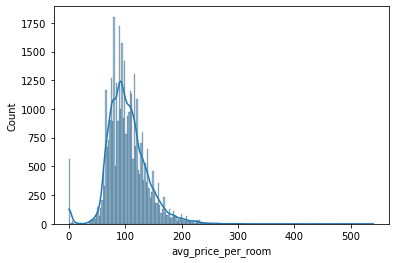

In [19]:
# plot the distribution
sns.histplot(data=df, x = 'avg_price_per_room', kde=True)

The distribution looks funky with the compensated rooms taking up the 0 cost positions. But the incredibly long tail on the distribution has me worried about the z score of this outlier. Lets find the z_score and see how it fares

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Count'>

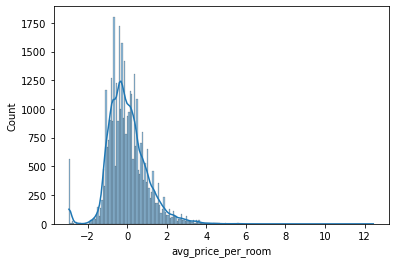

In [20]:
# make a function to transform values into z-scores
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)
# apply the function to our column
z_price = z_transform(df['avg_price_per_room'])
#plot the column
sns.histplot(z_price, kde=True)

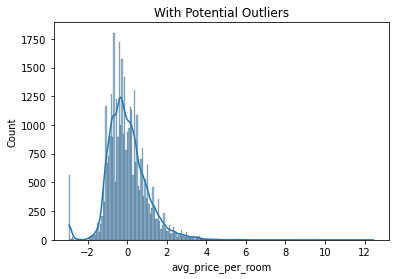

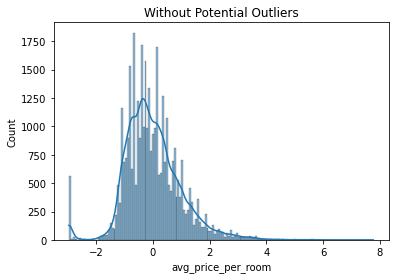

In [21]:
# let's see how the chart would shift if the two outliers were dropped
# define outliers in a copy of original dataframe
df2 = df.copy(deep=True)
outlier_price = df2.nlargest(1,['avg_price_per_room'])

# drop outliers from new dataframe
df2.drop(outlier_price.index, axis=0, inplace=True)

# plot both the original and new z-scores
z_price = z_transform(df['avg_price_per_room'])
sns.histplot(z_price,kde=True)
plt.title('With Potential Outliers')
plt.show()

z_price2 = z_transform(df2['avg_price_per_room'])
sns.histplot(z_price2,kde=True)
plt.title('Without Potential Outliers')
plt.show()

The graph drops over 4 stadard deviations from dropping one value. I feel comfortable dropping the outlier now, but lets check the actual value of the z score just to make sure

In [22]:
# make new column to define z-score of screen_size
df['z_price'] = z_transform(df['avg_price_per_room'])
df.nlargest(3,'avg_price_per_room')

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
33114   INN33115             2               0                     0   
9461    INN09462             3               0                     0   
20900   INN20901             2               1                     1   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
33114                  1                  1                           0   
9461                   2                  1                           0   
20900                  2                  2                           0   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
33114                   1         35          2018              3   
9461                    4         21          2018             12   
20900                   1        173          2018              7   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
33114            25               0                             0   
9461             30               0                             0   
20900            25               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0               540.0   
9461                                      0               375.5   
20900                                     0               365.0   

       no_of_special_requests booking_status  market_segment_type_Aviation  \
33114                       0       Canceled                             0   
9461                        0   Not_Canceled                             0   
20900                       1       Canceled                             0   

       market_segment_type_Complementary  market_segment_type_Corporate  \
33114                                  0                              0   
9461                                   0                              0   
20900                                  0                              0   

       market_segment_type_Offline  market_segment_type_Online    z_price  
33114                            1                           0  12.441996  
9461                             0                           1   7.753909  
20900                            1                           0   7.454670

It is almost 5 standard deviations higher than any other observation. I feel very comfortable dropping the outlier now

In [23]:
# remove outliers in price from dataset
# define outliers
outlier_price = df.nlargest(1,['avg_price_per_room'])
# remove outliers
df.drop(outlier_price.index, axis=0, inplace=True)

# remove z column
df.drop(['z_price'],axis=1,inplace=True)

# check for removal and column dropped as well
df.nlargest(2,['avg_price_per_room'])
# this entry will now change since the outliers were removed

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
9461    INN09462             3               0                     0   
20900   INN20901             2               1                     1   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
9461                   2                  1                           0   
20900                  2                  2                           0   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
9461                    4         21          2018             12   
20900                   1        173          2018              7   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
9461             30               0                             0   
20900            25               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
9461                                      0               375.5   
20900                                     0               365.0   

       no_of_special_requests booking_status  market_segment_type_Aviation  \
9461                        0   Not_Canceled                             0   
20900                       1       Canceled                             0   

       market_segment_type_Complementary  market_segment_type_Corporate  \
9461                                   0                              0   
20900                                  0                              0   

       market_segment_type_Offline  market_segment_type_Online  
9461                             0                           1  
20900                            1                           0

The entires changed here (observed using the booking_ID) and the z score column has been successfully dropped. We have successfully dropped the outlier as desired

In [24]:
# lets now switch our target variable to be a 0 or 1
# 0 will represent not cancelled and 1 will represent cancelled
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
df.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  2                  1                           0   
1                  3                  0                           0   
2                  1                  1                           0   
3                  2                  1                           0   
4                  1                  0                           0   
5                  2                  2                           0   
6                  3                  1                           0   
7                  3                  1                           0   
8                  4                  1                           0   
9                  5                  1                           0   

   room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                   1        224          2017             10             2   
1                   1          5          2018             11             6   
2                   1          1          2018              2            28   
3                   1        211          2018              5            20   
4                   1         48          2018              4            11   
5                   1        346          2018              9            13   
6                   1         34          2017             10            15   
7                   4         83          2018             12            26   
8                   1        121          2018              7             6   
9                   4         44          2018             10            18   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests  booking_status  market_segment_type_Aviation  \
0                       0               0                             0   
1                       1               0                             0   
2                       0               1                             0   
3                       0               1    

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36274 entries, 0 to 36274
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36274 non-null  object 
 1   no_of_adults                          36274 non-null  int64  
 2   no_of_children                        36274 non-null  int64  
 3   no_of_weekend_nights                  36274 non-null  int64  
 4   no_of_week_nights                     36274 non-null  int64  
 5   type_of_meal_plan                     36274 non-null  int64  
 6   required_car_parking_space            36274 non-null  int64  
 7   room_type_reserved                    36274 non-null  int64  
 8   lead_time                             36274 non-null  int64  
 9   arrival_year                          36274 non-null  int64  
 10  arrival_month                         36274 non-null  int64  
 11  arrival_date   

##### Insight: 
We successully transformed not_canceled into 0's and Canceled into 1's. We have all non-categorical type variables with no missing/null values and have treated the outliers. I think we can do a quick re-check EDA and move onto the modeling.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [26]:
# check the new shape
df.shape

(36274, 23)

We have lost only one row due to the outlier we removed

In [27]:
# check the data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36274 entries, 0 to 36274
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36274 non-null  object 
 1   no_of_adults                          36274 non-null  int64  
 2   no_of_children                        36274 non-null  int64  
 3   no_of_weekend_nights                  36274 non-null  int64  
 4   no_of_week_nights                     36274 non-null  int64  
 5   type_of_meal_plan                     36274 non-null  int64  
 6   required_car_parking_space            36274 non-null  int64  
 7   room_type_reserved                    36274 non-null  int64  
 8   lead_time                             36274 non-null  int64  
 9   arrival_year                          36274 non-null  int64  
 10  arrival_month                         36274 non-null  int64  
 11  arrival_date   

We still do not have any nulls/missing values. All varaibles are now non-categorical type variables which is great for modeling.

In [28]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36274.0     1.844958   0.518721     0.0   
no_of_children                        36274.0     0.105282   0.402653     0.0   
no_of_weekend_nights                  36274.0     0.810746   0.870645     0.0   
no_of_week_nights                     36274.0     2.204334   1.410910     0.0   
type_of_meal_plan                     36274.0     0.949964   0.480198     0.0   
required_car_parking_space            36274.0     0.030986   0.173283     0.0   
room_type_reserved                    36274.0     1.708910   1.399865     1.0   
lead_time                             36274.0    85.233942  85.931596     0.0   
arrival_year                          36274.0  2017.820422   0.383841  2017.0   
arrival_month                         36274.0     7.423775   3.069849     1.0   
arrival_date                          36274.0    15.596736   8.740428     1.0   
repeated_guest                        36274.0     0.025638   0.158056     0.0   
no_of_previous_cancellations          36274.0     0.023350   0.368337     0.0   
no_of_previous_bookings_not_canceled  36274.0     0.153416   1.754195     0.0   
avg_price_per_room                    36274.0   103.411504  35.014953     0.0   
no_of_special_requests                36274.0     0.619672   0.786240     0.0   
booking_status                        36274.0     0.327618   0.469351     0.0   
market_segment_type_Aviation          36274.0     0.003446   0.058602     0.0   
market_segment_type_Complementary     36274.0     0.010779   0.103263     0.0   
market_segment_type_Corporate         36274.0     0.055605   0.229160     0.0   
market_segment_type_Offline           36274.0     0.290208   0.453864     0.0   
market_segment_type_Online            36274.0     0.639963   0.480018     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
type_of_meal_plan                        1.0     1.00     1.0     3.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
room_type_reserved                       1.0     1.00     1.0     7.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   375.5  
no_of_special_requests                   0.0     0.00     1.0     5.0  
booking_status                           0.0     0.00     1.0     1.0  
market_segment_type_Aviation             0.0     0.00     0.0     1.0  
market_segment_type_Complementary        0.0     0.00     0.0     1.0  
market_segment_type_Corporate            0.0     0.00     0.0     1.0  
market_segment_type_Offline              0.0     0.00     1.0     1.0  
market_segment_type_Online               0.0     1.00     1.0     1.0

We can see all the new columns that we added from the one-hot encoding of the market segment type

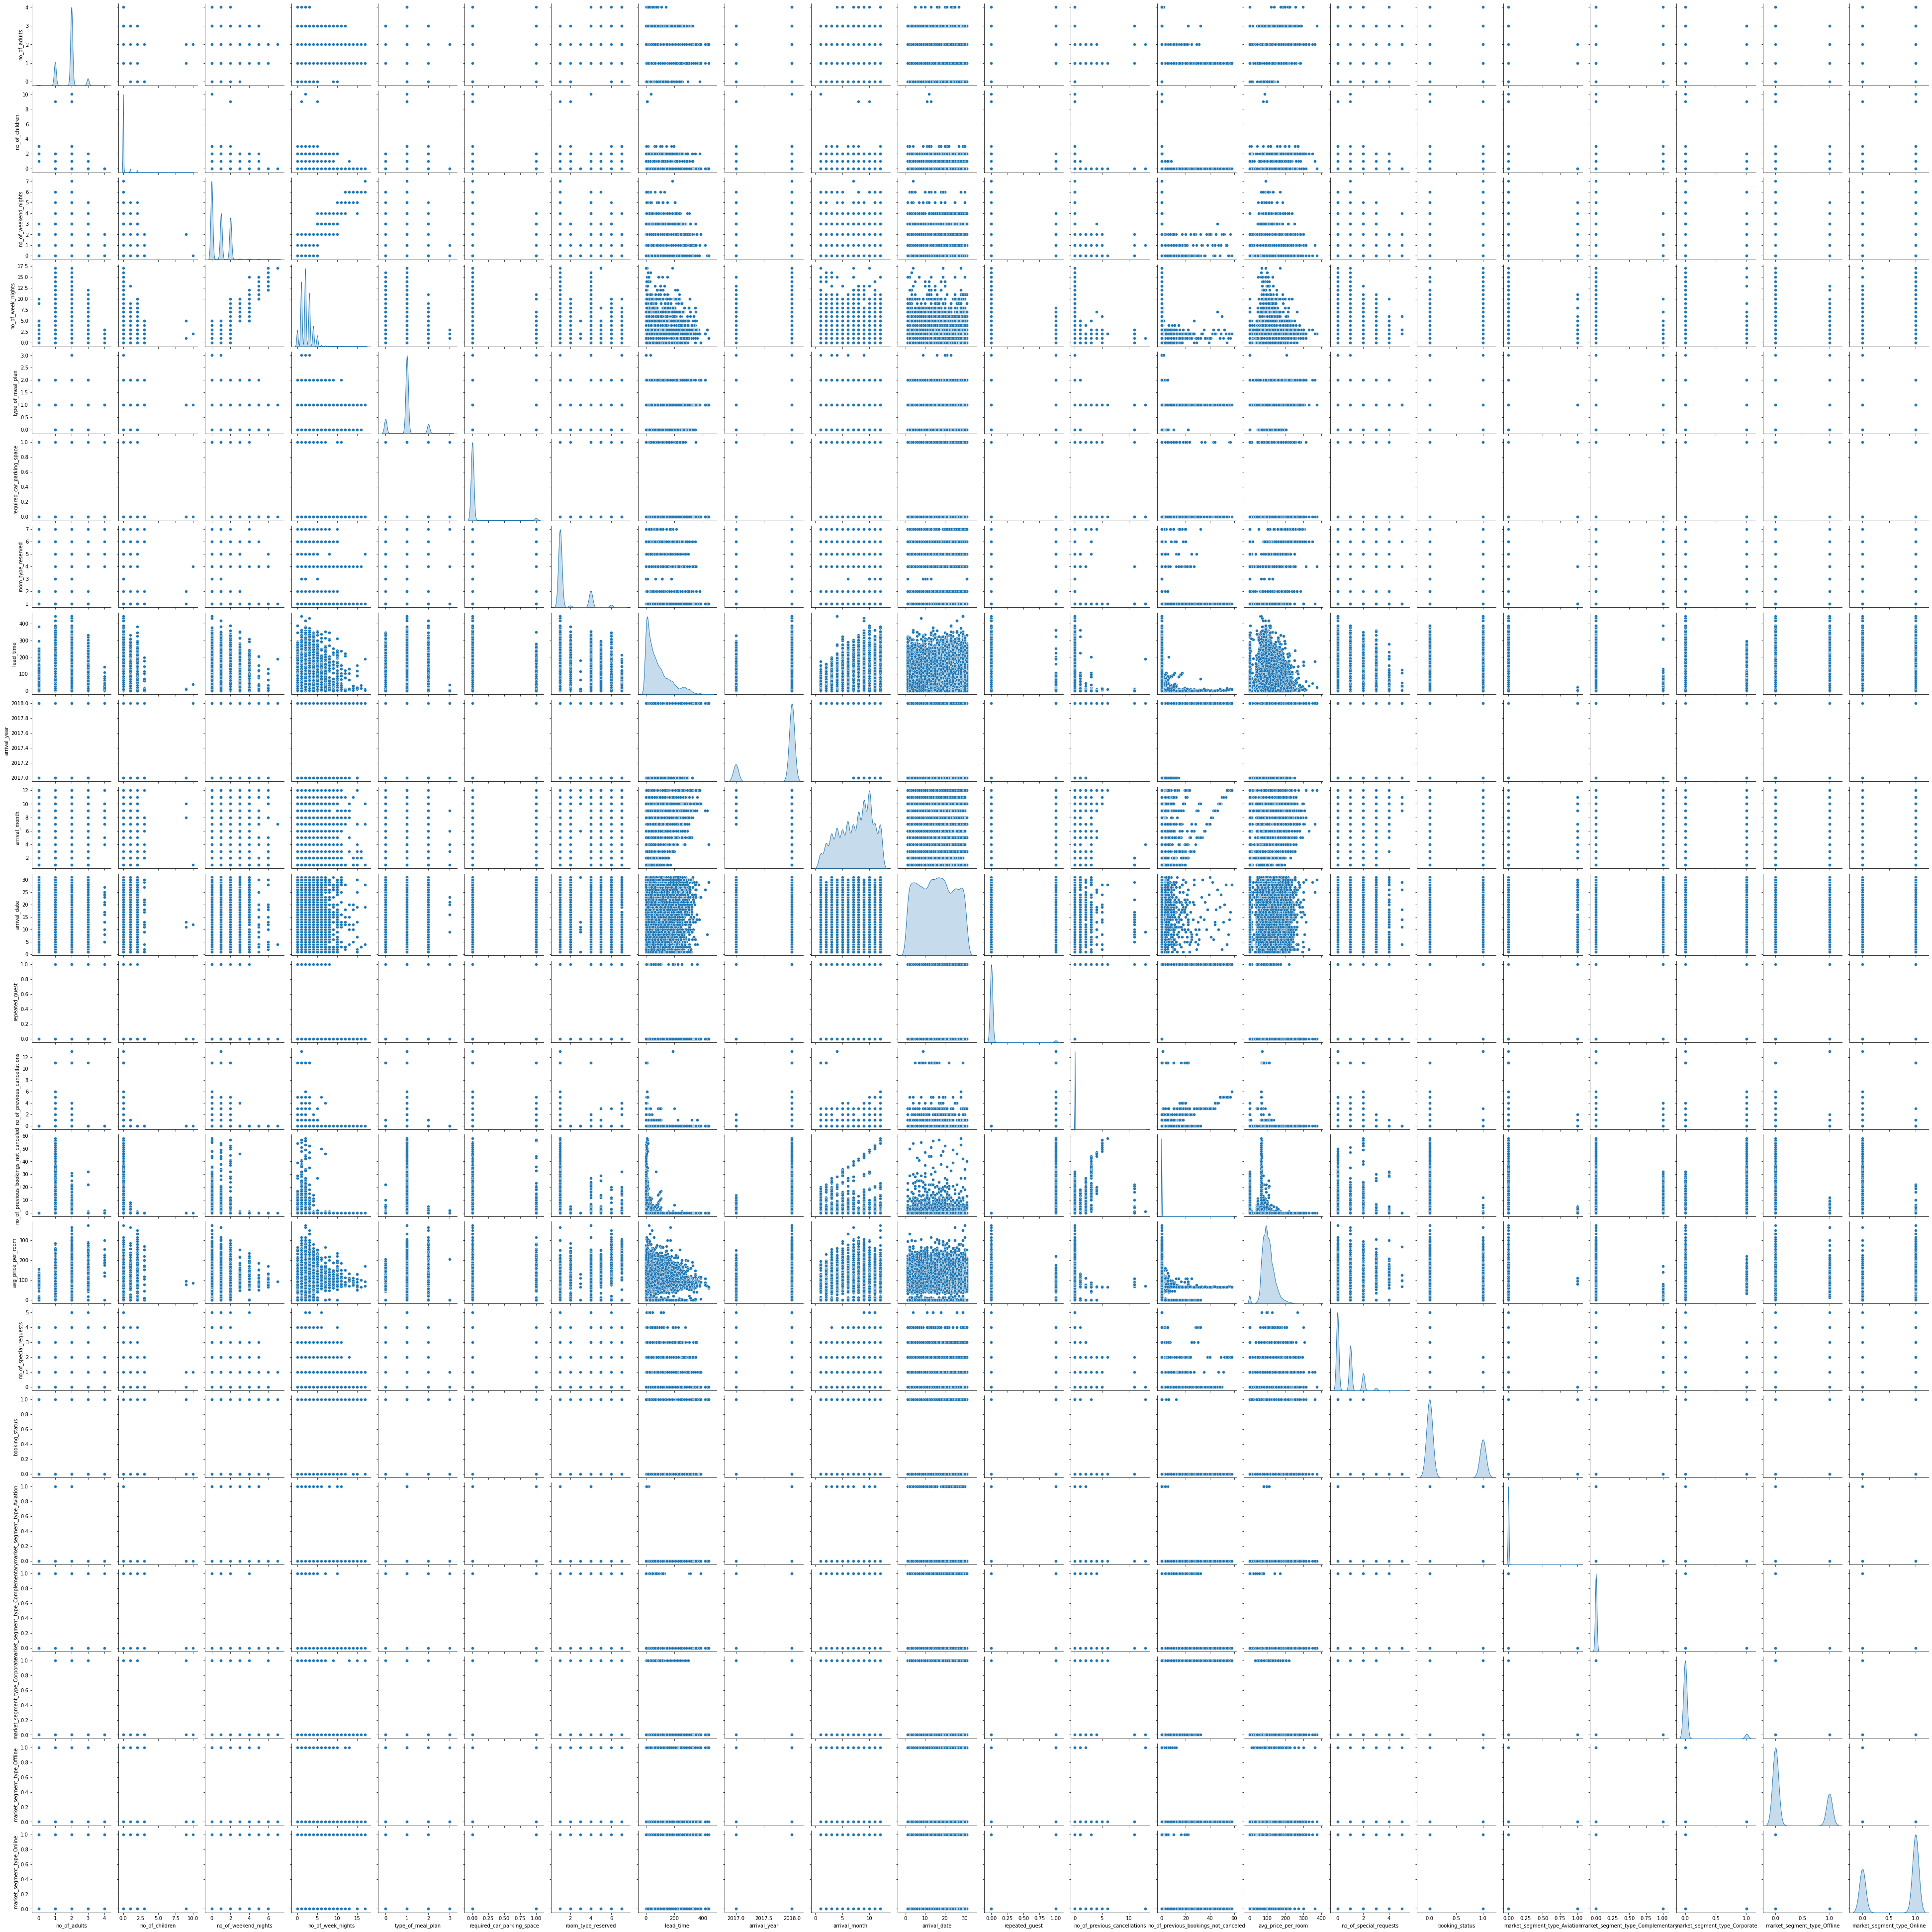

In [29]:
# lets look at a pairplot as our final check
sns.pairplot(df,diag_kind='kde')

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [30]:
# as we go into the modeling stage we need to split our data into training and testing data
# let's name our x varaibles first
# we are dropping booking status because it is our y variable
# dropping the booking_ID and arrival_year as they will not be effective in the modeling 
x = df.drop(['booking_status','Booking_ID', 'arrival_year'],axis=1)

# name our y variable
y = df[['booking_status']]

# let's now split the x and y into training and testing data
# we are going with a 70% training data, 30% testing data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [31]:
# import the VIF from stats.models
from statsmodels.stats.outliers_influence import variance_inflation_factor

#define a function to evaluate the VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['feature'] = predictors.columns
    
    #calculate VIF for each feature we brought in from the predictor columns
    vif['VIF'] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns)) # loop through all columns in predictors using i
    ]
    return vif # return the dataframe as the output

In [32]:
checking_vif(x_train)

feature        VIF
0                           no_of_adults   1.321243
1                         no_of_children   1.261747
2                   no_of_weekend_nights   1.063845
3                      no_of_week_nights   1.086928
4                      type_of_meal_plan   1.306066
5             required_car_parking_space   1.034030
6                     room_type_reserved   1.554390
7                              lead_time   1.235121
8                          arrival_month   1.053557
9                           arrival_date   1.005390
10                        repeated_guest   1.762999
11          no_of_previous_cancellations   1.344408
12  no_of_previous_bookings_not_canceled   1.589869
13                    avg_price_per_room   1.854884
14                no_of_special_requests   1.241432
15          market_segment_type_Aviation   1.098095
16     market_segment_type_Complementary   1.354835
17         market_segment_type_Corporate   2.664550
18           market_segment_type_Offline  10.855767
19            market_segment_type_Online  23.701822

We are using a VIF score of 10 to evaluate if there is any multi-collinearity. Two variables seem to exceed that limit, market_segment_type_Online and market_segment_type_Offline. We will remove the variable with the higher VIF and re-run the test. 

In [33]:
x_train1 = x_train.drop(['market_segment_type_Online'], axis = 1)

checking_vif(x_train1)

feature        VIF
0                           no_of_adults  13.559297
1                         no_of_children   1.345016
2                   no_of_weekend_nights   1.955807
3                      no_of_week_nights   3.561271
4                      type_of_meal_plan   6.329755
5             required_car_parking_space   1.067147
6                     room_type_reserved   3.780648
7                              lead_time   2.446060
8                          arrival_month   6.363702
9                           arrival_date   3.849778
10                        repeated_guest   1.802248
11          no_of_previous_cancellations   1.349047
12  no_of_previous_bookings_not_canceled   1.601779
13                    avg_price_per_room  14.921406
14                no_of_special_requests   2.003735
15          market_segment_type_Aviation   1.026038
16     market_segment_type_Complementary   1.228059
17         market_segment_type_Corporate   1.456788
18           market_segment_type_Offline   2.108387

By removing the online market segment it seems to have taken care of the issues with the offline market segment type. It has however inflated the VIF for avg price per room and no_of_adults. We will again 1 by 1 remove the highest VIFs over 10 to see how it affects the multi-collinearity.

In [34]:
x_train2 = x_train1.drop(['avg_price_per_room'], axis = 1)

checking_vif(x_train2)

feature        VIF
0                           no_of_adults  10.419866
1                         no_of_children   1.276830
2                   no_of_weekend_nights   1.951939
3                      no_of_week_nights   3.559737
4                      type_of_meal_plan   5.703141
5             required_car_parking_space   1.063842
6                     room_type_reserved   3.421107
7                              lead_time   2.425994
8                          arrival_month   5.903716
9                           arrival_date   3.780703
10                        repeated_guest   1.800020
11          no_of_previous_cancellations   1.349041
12  no_of_previous_bookings_not_canceled   1.601713
13                no_of_special_requests   1.998499
14          market_segment_type_Aviation   1.025551
15     market_segment_type_Complementary   1.090967
16         market_segment_type_Corporate   1.456582
17           market_segment_type_Offline   2.066038

After removing avg price per room, the VIF for no_of_adults has come down some, but not enough to meet our threshold. We will remove it as well to see if we can get all VIFs under 10.

In [35]:
x_train3 = x_train2.drop(['no_of_adults'], axis = 1)

checking_vif(x_train3)

feature       VIF
0                         no_of_children  1.241575
1                   no_of_weekend_nights  1.911426
2                      no_of_week_nights  3.413540
3                      type_of_meal_plan  5.431598
4             required_car_parking_space  1.060520
5                     room_type_reserved  2.999791
6                              lead_time  2.401633
7                          arrival_month  5.126096
8                           arrival_date  3.454759
9                         repeated_guest  1.797853
10          no_of_previous_cancellations  1.346582
11  no_of_previous_bookings_not_canceled  1.599981
12                no_of_special_requests  1.929229
13          market_segment_type_Aviation  1.019209
14     market_segment_type_Complementary  1.089363
15         market_segment_type_Corporate  1.448905
16           market_segment_type_Offline  2.064425

We now have removed any high level offenders of multi-collinearity. We can move forward with building the model after we remove all these variables from the test data as well.

In [36]:
# we need to remove the variables from the test data as well so we are evaluating the model with the same columns
x_test3 = x_test.drop(['market_segment_type_Online','avg_price_per_room','no_of_adults'], axis = 1)

In [37]:
# we can quickly test that those columns are indeed out of the training and testing data
print(x_train3.columns.tolist())
print(x_test3.columns.tolist())

['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline']
['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline']


We have identical columns in both the testing and training data so we can move forward with building the model.

## Building a Logistic Regression model

In [38]:
# we will use the statmodels libary to build our regression model
# fitting logistic regression model
logit = sm.Logit(y_train, x_train3.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25391
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           16
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2956
Time:                        17:06:06   Log-Likelihood:                -11347.
converged:                      False   LL-Null:                       -16110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.2640      0.042      6.275      0.000       0.182       0.346
no_of_weekend_nights                     0.0479      

C:\Users\theov\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


WE will need to take care of some of the variables with p_values higher than the standard LOS, which is 0.05. 

## Model performance evaluation

We will make some user-defined functions to evaluate the performance of our model. First a fucntion to show us our recall, accuracy, precision and F1 score.

Next we will evaluate our results using a confusion matrix generated by another user-defined function. 

These two tools will help us easily define how the model performs after we remove some variables for p-values that are too high

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [40]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

We can now see how our models perform with 2 very short functions that gives us all the metrics we would like to evaluate

In [41]:
# check model performance
model_performance_classification_statsmodels(lg, x_train3, y_train)

Accuracy    Recall  Precision        F1
0  0.787917  0.596067   0.714735  0.650029

So far, our model has performed okay. If we look back on our EDA, we can see that if we predicted everything as not cancelled, we would have an accuracy of just over 67%. So a starting accuracy of 78.8% is definitely adding value. 

Let's see how the model performs after we remove some more variables for p_values that exceed our LOS.

In [42]:
# remember this is where the model is starting
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25391
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           16
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2956
Time:                        17:06:06   Log-Likelihood:                -11347.
converged:                      False   LL-Null:                       -16110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.2640      0.042      6.275      0.000       0.182       0.346
no_of_weekend_nights                     0.0479      

We need to look at the following variables
- type_of_meal_plan
- no_of_previous_bookings_not_canceled
- market_segment_type_Aviation
- market_segment_type_Complementary

In [43]:
x_train4 = x_train3.drop(['market_segment_type_Complementary'], axis =1)
logit4 = sm.Logit(y_train, x_train4.astype(float))
lg4 = logit4.fit()

print(lg4.summary())

Optimization terminated successfully.
         Current function value: 0.449426
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25391
Model:                          Logit   Df Residuals:                    25375
Method:                           MLE   Df Model:                           15
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2917
Time:                        17:06:07   Log-Likelihood:                -11411.
converged:                       True   LL-Null:                       -16110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.2661      0.

The p-values of the other 3 trouble making columns seem to have come down a tad but not enough to be kept, at the moment. Let's run our user function to look at metrics.


In [44]:
model_performance_classification_statsmodels(lg4, x_train4, y_train)

Accuracy    Recall  Precision        F1
0  0.787287  0.591538   0.715439  0.647615

Not much change at all in the performance (better or worse). let's continue removing the next highest p_value

In [45]:
x_train5 = x_train4.drop(['market_segment_type_Aviation'], axis =1)
logit5 = sm.Logit(y_train, x_train5.astype(float))
lg5 = logit5.fit()

print(lg5.summary())
model_performance_classification_statsmodels(lg5, x_train5, y_train)

Optimization terminated successfully.
         Current function value: 0.449429
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25391
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           14
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2917
Time:                        17:06:07   Log-Likelihood:                -11411.
converged:                       True   LL-Null:                       -16110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                           0.2656      0.

Accuracy    Recall  Precision       F1
0  0.787366  0.592133   0.715335  0.64793

Again the model seems mostly uneffected. Lets move onto the next variable to remove

In [46]:
x_train6 = x_train5.drop(['no_of_previous_bookings_not_canceled'], axis =1)
logit6 = sm.Logit(y_train, x_train6.astype(float))
lg6 = logit6.fit()

print(lg6.summary())
model_performance_classification_statsmodels(lg6, x_train6, y_train)

Optimization terminated successfully.
         Current function value: 0.449461
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25391
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           13
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2916
Time:                        17:06:07   Log-Likelihood:                -11412.
converged:                       True   LL-Null:                       -16110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
no_of_children                    0.2657      0.042      6.354      0.

Accuracy    Recall  Precision        F1
0  0.787326  0.592014   0.715294  0.647841

Again the model seems mostly uneffected. Lets move onto the final variable to remove

In [47]:
x_train7 = x_train6.drop(['type_of_meal_plan'], axis =1)
logit7 = sm.Logit(y_train, x_train7.astype(float))
lg7 = logit7.fit()

print(lg7.summary())
model_performance_classification_statsmodels(lg7, x_train7, y_train)

Optimization terminated successfully.
         Current function value: 0.449513
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25391
Model:                          Logit   Df Residuals:                    25378
Method:                           MLE   Df Model:                           12
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2915
Time:                        17:06:07   Log-Likelihood:                -11414.
converged:                       True   LL-Null:                       -16110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
no_of_children                    0.2646      0.042      6.325      0.

Accuracy    Recall  Precision        F1
0  0.787129  0.594636   0.713428  0.648638

We have removed all 4 variables of p_values greater than our LOS, and the model performance has not truly improved or gotten worse. We will consider the x_train7 and lg7 as the final training set and model

We need to convert the coefficients to regular odds since they are in a logistic regression model. We cannot interpret them based on just their value alone, unlike a linear model



In [48]:
# converting coefficients to odds
odds = np.exp(lg7.params)

# finding the percentage change
perc_change_odds = (np.exp(lg7.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train7.columns).T

no_of_children  no_of_weekend_nights  no_of_week_nights  \
Odds               1.302846              1.052104           0.972191   
Change_odd%       30.284631              5.210404          -2.780876   

             required_car_parking_space  room_type_reserved  lead_time  \
Odds                           0.225052            1.034578   1.015267   
Change_odd%                  -77.494824            3.457786   1.526668   

             arrival_month  arrival_date  repeated_guest  \
Odds              0.926451      0.990261        0.062753   
Change_odd%      -7.354945     -0.973927      -93.724750   

             no_of_previous_cancellations  no_of_special_requests  \
Odds                             1.230327                0.240194   
Change_odd%                     23.032742              -75.980643   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.246585                     0.123796  
Change_odd%                     -75.341458                   -87.620360

##### Insights: 
A good way to to interpret these results now is seeing a number over 1 on the Odds line and seeing a positive number in the Change_odd% is increasing the chances of a cancellation.

For example, the number of children. Adding a one unit increase in the number of children increase the liklihood of cancellation by 30%.

The main highlights from this analysis are as follows:
- requiring a parking space decreases the chances of cancellation by over 77%
- Being a repeated guest decreases cancellation odds by 93%
- An increase in special reuqests, decreases odds of cancellation by 75%
- if the market segment type is corporate that decreases odds by 75% and if its offline it decreases odds by 87%



Accuracy    Recall  Precision        F1
0  0.787129  0.594636   0.713428  0.648638

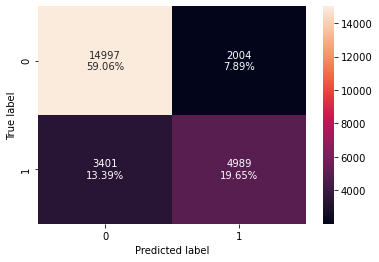

In [49]:
# let's check our confusion matrix to look at performance
confusion_matrix_statsmodels(lg7, x_train7, y_train)

model_performance_classification_statsmodels(lg7, x_train7, y_train)

##### Model Performance:
As stated previously, if we predicted everything as not cancelled, we would have an accuracy of just over 67%. We are currently sitting at a model accuradcy of 78.7%. You can see that in our confusion matrix by adding up the 0,0 and 1,1 square values or seeing the accuracy score directly above it. Let's graphically look at the model performance

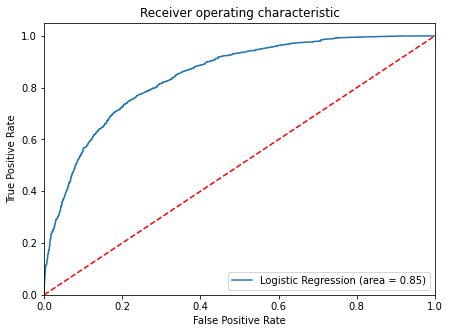

In [50]:
logit_roc_auc_train = roc_auc_score(y_train, lg7.predict(x_train7))
fpr, tpr, thresholds = roc_curve(y_train, lg7.predict(x_train7))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Let's see if we can improve model performance by changing the threshold of the model. We can accomplish this by using the curve to find the optimal threshold.

In [51]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg7.predict(x_train7))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3411217081407506


Accuracy    Recall  Precision        F1
0  0.765035  0.769368   0.615583  0.683937

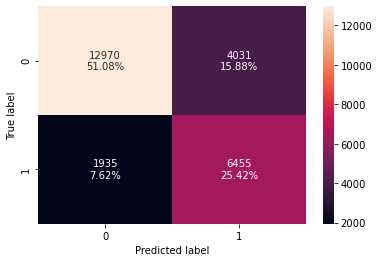

In [52]:
# lets check model performance with this new threshold
# creating confusion matrix
confusion_matrix_statsmodels(lg7, x_train7, y_train, threshold=optimal_threshold_auc_roc)

# checking metric performance 
model_performance_classification_statsmodels(lg7, x_train7, y_train, threshold=optimal_threshold_auc_roc)

With the new threshold, we sacrificed a small amount of accuracy for a huge gain in Recall and a small gain in the F_1 score.

Let's see if we can find a better threshold with a precision and recall curve

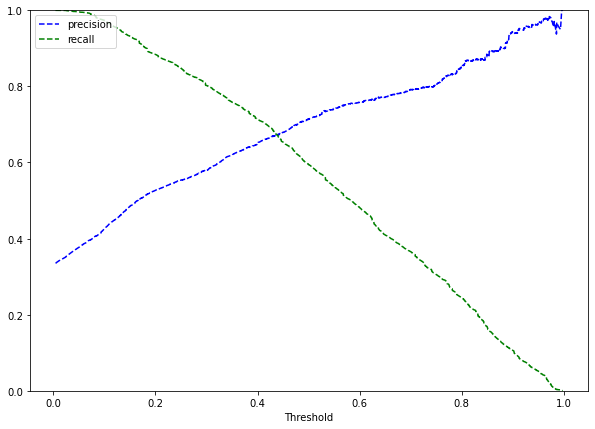

In [53]:
y_scores = lg7.predict(x_train7)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Let's try a threshold of 0.43 and see if that improves over all model performance

Accuracy    Recall  Precision        F1
0  0.783664  0.684386   0.668685  0.676445

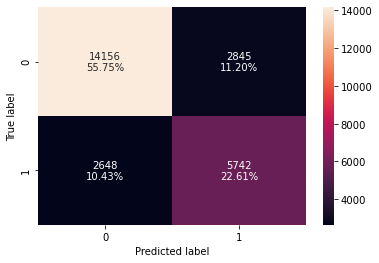

In [54]:
new_threshold = 0.43

# lets check model performance with this new threshold
# creating confusion matrix
confusion_matrix_statsmodels(lg7, x_train7, y_train, threshold=new_threshold)

# checking metric performance 
model_performance_classification_statsmodels(lg7, x_train7, y_train, threshold=new_threshold)

Overall this increased our accuracy but dropped our recall way too much. Recall is the most important metric for us since we are trying to predict the 1 values are often as possible, which recall is a measure of. We will stick with the previous model.

Now that we feel comfortable with the optimal performance of the model on the training set. Let's run the testing data to see how our model performs on brand new data.

In [55]:
# need to catch up the testing data with the columns dropped from the training data
x_test7 = x_test3.drop(['type_of_meal_plan', 'no_of_previous_bookings_not_canceled', 'market_segment_type_Aviation',
                        'market_segment_type_Complementary'], axis = 1 )

Accuracy    Recall  Precision        F1
0  0.766425  0.774757   0.606679  0.680493

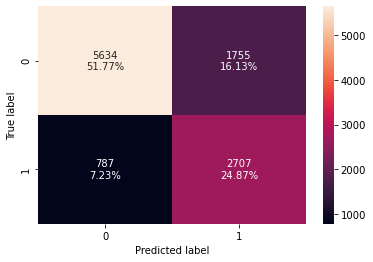

In [56]:
# lets check model performance on testing data
# creating confusion matrix
confusion_matrix_statsmodels(lg7, x_test7, y_test, threshold=optimal_threshold_auc_roc)

# checking metric performance 
model_performance_classification_statsmodels(lg7, x_test7, y_test, threshold=optimal_threshold_auc_roc)

## Final Model Summary

Accuracy    Recall  Precision        F1
0  0.766425  0.774757   0.606679  0.680493

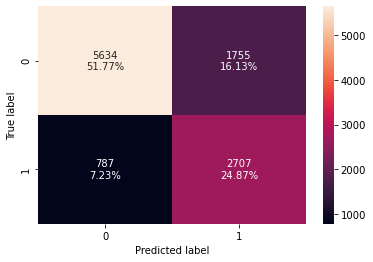

In [57]:
# creating confusion matrix
confusion_matrix_statsmodels(lg7, x_test7, y_test, threshold=optimal_threshold_auc_roc)

# checking metric performance 
model_performance_classification_statsmodels(lg7, x_test7, y_test, threshold=optimal_threshold_auc_roc)

##### Insights:
The performance of the model on the testing and training data is highly encouraging in that we did not over/under fit the model in anyway. The threshold performance on the testing data seems to be a very positive indication of a well tuned model. The accuracy of the model increased from 67% from a blanket statement of non are going to cancel to 76% with our model. The recall score can tell us that we can predict the booking is going to be cancelled correctly 77.5% of the time. 

## Building a Decision Tree model

Building a decision tree will be easier now that we have some things already pre-done from the other analysis.

We have the confusion matrix function already built.

We have removed collinearity

We have the model performance function already built

The data is already cleaned and explored

The Data is already split into training and testing data

In [58]:
# define our decision tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
# run our decision tree
dTree.fit(x_train7, y_train)

DecisionTreeClassifier(random_state=1)

In [59]:
# let's see how it performed on training and testing data
print(dTree.score(x_train7,y_train))
print(dTree.score(x_test7,y_test))

0.9826710251663976
0.8476523017550308


As expected, it seems to have really overfit the training data in comparison to the testing data. Since we did not use any parameters to control the spread of the tree it makes sense. Let's view the metrics and confusion matrix of the model

In [60]:
# lets see how many cancellations are in the data set
print(y.sum(axis=0))
print(df.shape[0])
print(1 - (y.sum(axis=0)/df.shape[0]))

booking_status    11884
dtype: int64
36274
booking_status    0.672382
dtype: float64


Accuracy    Recall  Precision        F1
0  0.982671  0.962455   0.984756  0.973478

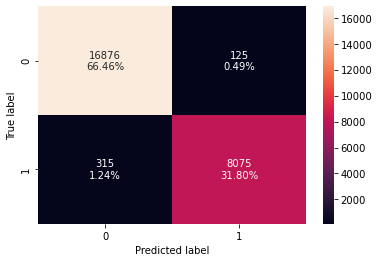

In [61]:
# let's look at the confusion matrix and metrics
# creating confusion matrix on test data
confusion_matrix_statsmodels(dTree, x_train7, y_train)

# checking metric performance on test data
model_performance_classification_statsmodels(dTree, x_train7, y_train)

Accuracy    Recall  Precision        F1
0  0.847652  0.767315   0.760352  0.763818

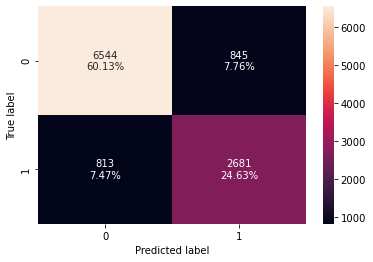

In [62]:
# let's look at the confusion matrix and metrics
# creating confusion matrix on test data
confusion_matrix_statsmodels(dTree, x_test7, y_test)

# checking metric performance on test data
model_performance_classification_statsmodels(dTree, x_test7, y_test)

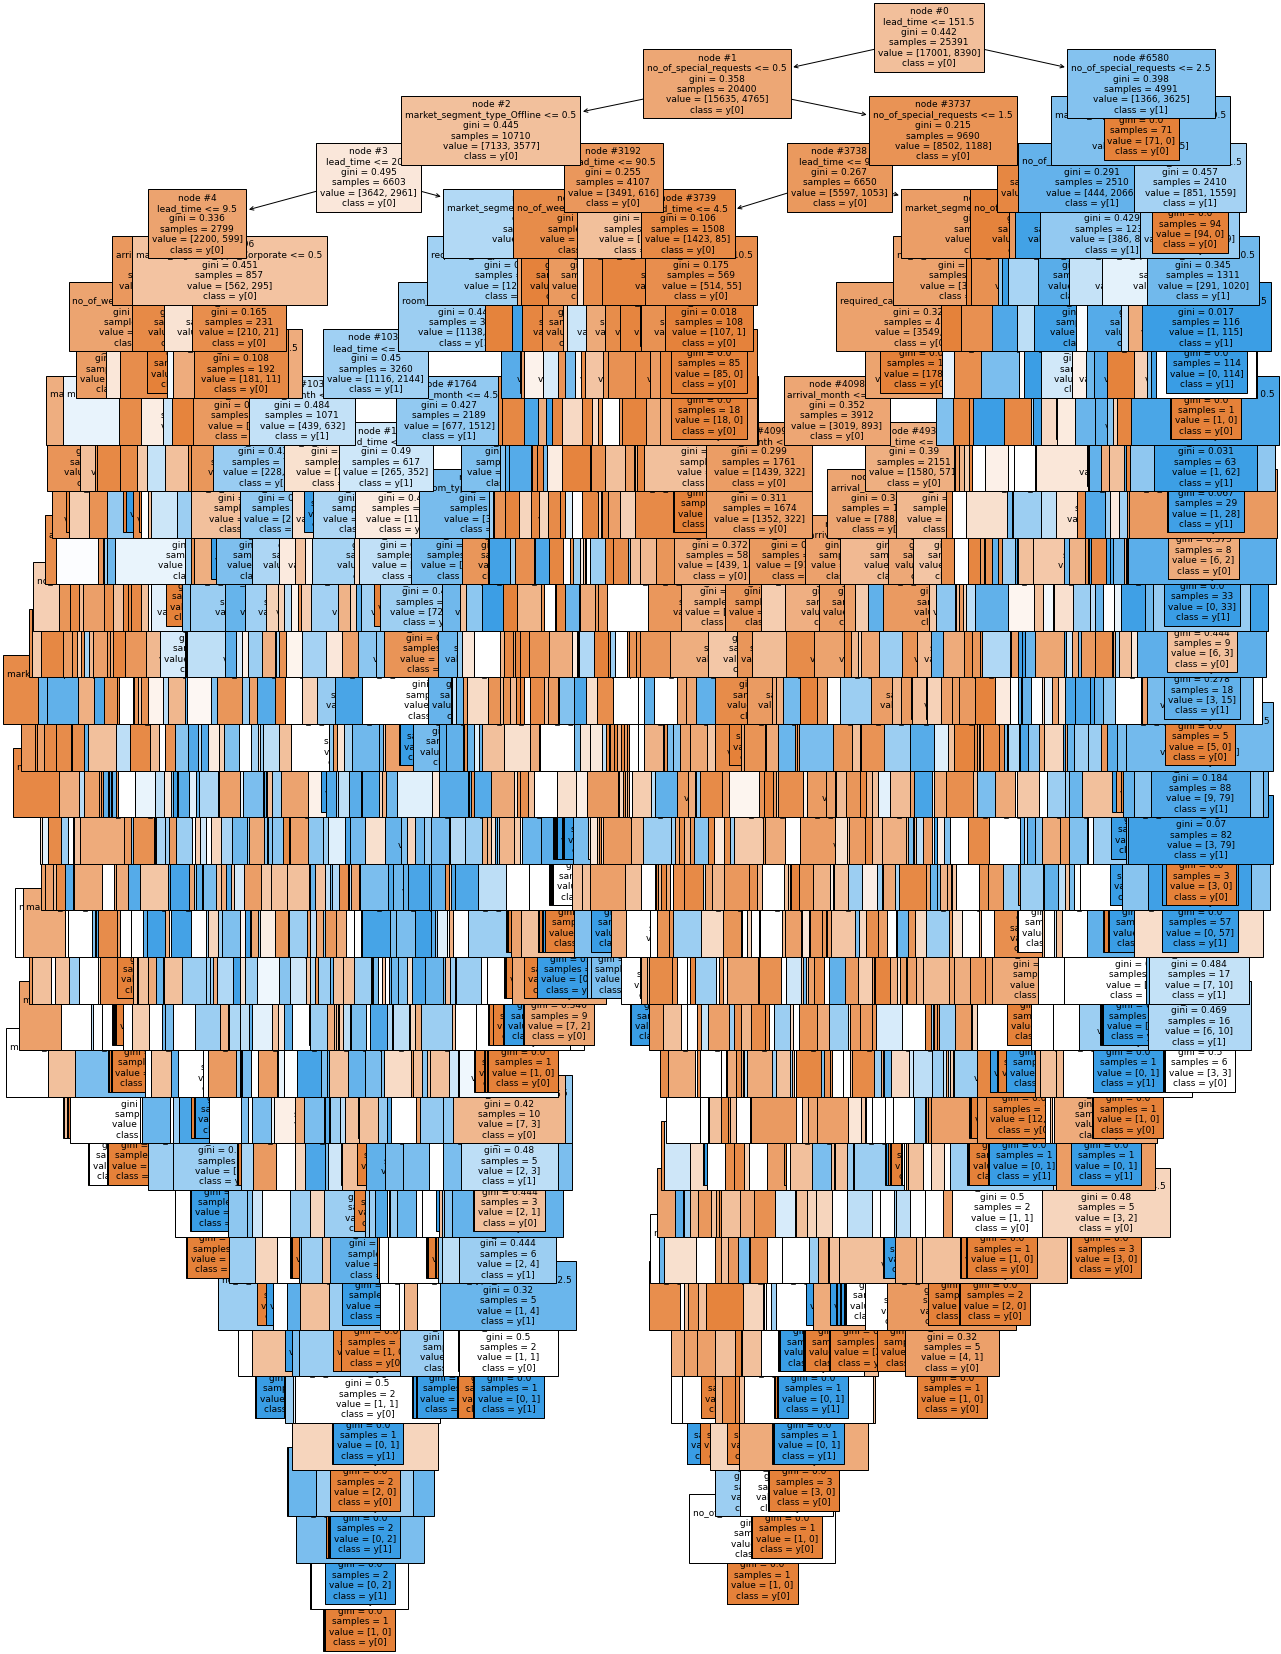

In [63]:
# lets now see what the tree looks like
# the dTree model was last fit on training data so that is how it will perform here in the visual
plt.figure(figsize=(20,30))
tree.plot_tree(dTree, feature_names = list(x_train7.columns), filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

As you can see, the tree overfit on the training data by getting down to perfectly pure nodes. We will need to prune the tree.

## Do we need to prune the tree?

In [64]:
# lets look at the importance of each of the columns
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=x_train7.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
lead_time                      0.448011
arrival_date                   0.134712
arrival_month                  0.094676
no_of_week_nights              0.073487
no_of_special_requests         0.072662
no_of_weekend_nights           0.054649
market_segment_type_Offline    0.053159
room_type_reserved             0.030383
market_segment_type_Corporate  0.015645
no_of_children                 0.012761
required_car_parking_space     0.008081
repeated_guest                 0.001463
no_of_previous_cancellations   0.000312


### Pre-Pruning
We will use the technique of grid-searching to find the best hyper-parameters for pre-pruning

In [65]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
# Add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train7, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(x_train7, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

Accuracy    Recall  Precision       F1
0   0.79477  0.713588   0.680728  0.69677

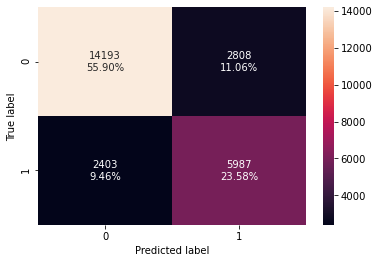

In [66]:
# let's evaulate the new model's performance
# let's look at the confusion matrix and metrics
# creating confusion matrix on test data
confusion_matrix_statsmodels(estimator, x_train7, y_train)

# checking metric performance on test data
model_performance_classification_statsmodels(estimator, x_train7, y_train)

The model is no longer over-ftting the training data and even though the metrics went down, it is good that it is making a more generalized model.

Accuracy    Recall  Precision        F1
0  0.788845  0.705781   0.660064  0.682158

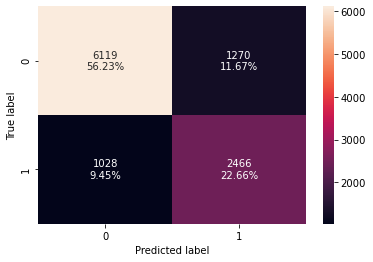

In [67]:
# let's check against test data 
# let's look at the confusion matrix and metrics
# creating confusion matrix on test data
confusion_matrix_statsmodels(estimator, x_test7, y_test)

# checking metric performance on test data
model_performance_classification_statsmodels(estimator, x_test7, y_test)

Our metrics for the training and testing data are now very close to one another, specifically the recall scores are very close which means the model is better at not over-fitting. Based on the recall score, the model is currently predicting the defaults correctly 70.5% of the time. Lets look at what the tree looks like

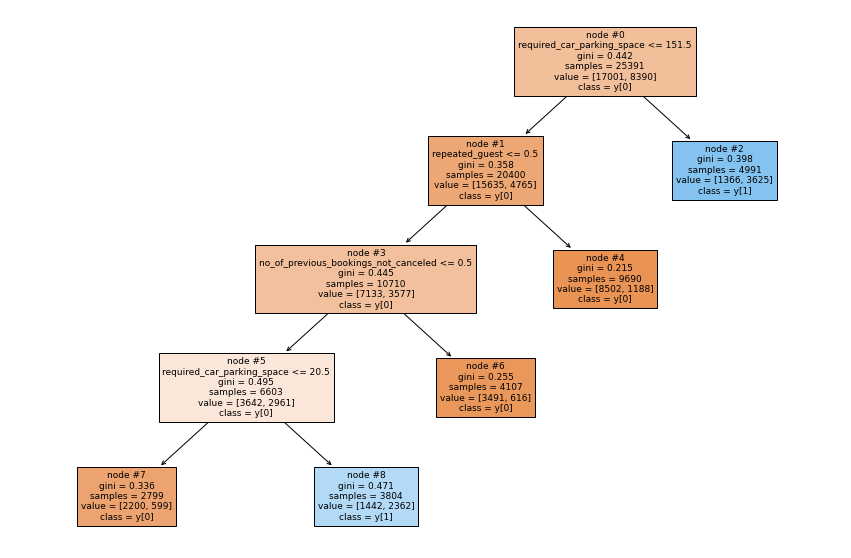

In [68]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=list(x.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [69]:
# lets also look at the importance of the variables to the model

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train7.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
lead_time                      0.732579
no_of_special_requests         0.134239
market_segment_type_Offline    0.133182
no_of_children                 0.000000
no_of_weekend_nights           0.000000
no_of_week_nights              0.000000
required_car_parking_space     0.000000
room_type_reserved             0.000000
arrival_month                  0.000000
arrival_date                   0.000000
repeated_guest                 0.000000
no_of_previous_cancellations   0.000000
market_segment_type_Corporate  0.000000


Since we simplified the tree so much using our 'ideal' hyper parameters, the level of importance of these variables gets higher for the few chosen to split on for the model. Again, lead time seems to be very important feature in determining the likliehood of a cancellation.

### Post-Pruning
We will use the post-pruning technique of cost complexity pruning to see if post-pruning can yield a better model than the pre-pruning

In [70]:
# define data on the original decision tree with effective alphas and impurity at each step
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train7, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [71]:
# define new dataset as a dataframe
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.021916
1     0.000000e+00    0.021916
2     0.000000e+00    0.021916
3     0.000000e+00    0.021916
4     2.574120e-07    0.021917
...            ...         ...
1655  3.181505e-03    0.301060
1656  3.834301e-03    0.304894
1657  4.213663e-03    0.309108
1658  1.890054e-02    0.365810
1659  7.668391e-02    0.442493

[1660 rows x 2 columns]

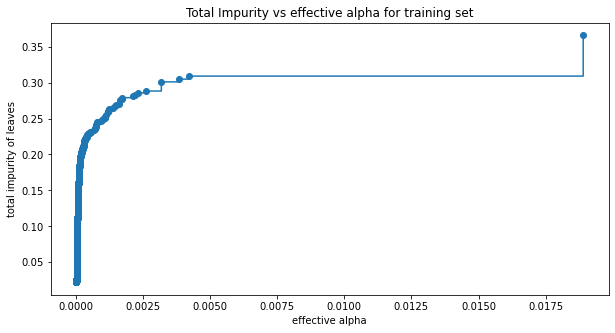

In [72]:
# let's visualize this relationship between the two values
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post") # plot everything except the last data point
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

As alpha increases, so does the impurity, which means as we prune the least significant node continuously, the impurity of the nodes becomes greater and greater. 

In [73]:
# create list for the classifier data using a for loop to loop through the alpha values 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha) # define model
    clf.fit(x_train7, y_train) # give model training data
    clfs.append(clf) #append results as the for loop runs through all alpha values 

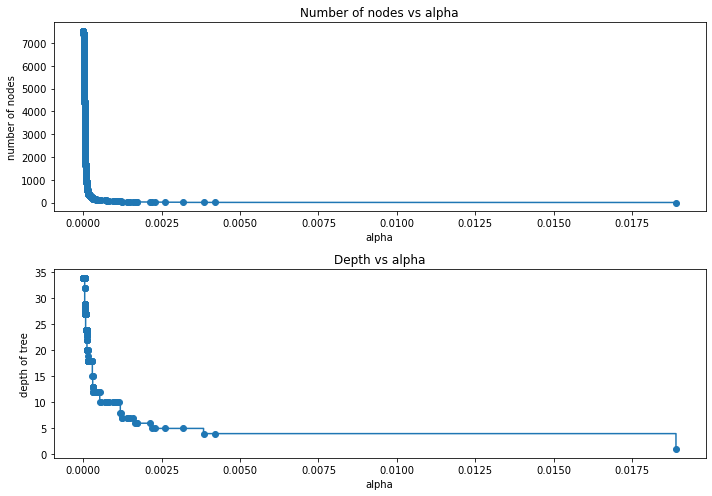

In [74]:
# let's visualize how the alphas evolve with the number of nodes and depth of the tree
clfs = clfs[:-1] # remember we take off the last node because it is simply a one node tree
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Since Recall is the best metric to evaluate this dataset, let us see how recall performs on the training and testing data

In [75]:
# using the same method as above for the clf for loop, we will create two recall data sets for training and testing
recall_train=[]
for clf in clfs:
    pred_train=clf.predict(x_train7)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [76]:
# now for testing data
recall_test=[]
for clf in clfs:
    pred_test=clf.predict(x_test7)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

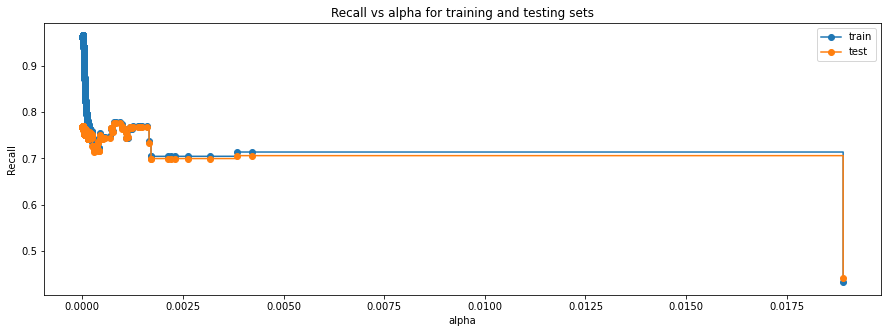

In [77]:
# now let us look graphically at how the two sets of data compare in the recall
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

It looks like there is a balance to be struck with performance and recall score. It seems we can prune many nodes without effecting the alpha or recall much at all. If we went with the overall highest recall we may not be able to be very well scoring in future data as it may overfit on what the data set we had. But we can't simplify the data. There seems to be an optimal model where both the testing and training data have a bump in recall. We will try to find that. 

In [78]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0007995585817755033, random_state=1)


In [79]:
# lets now apply that model to the training data
best_model.fit(x_train7,y_train)

DecisionTreeClassifier(ccp_alpha=0.0007995585817755033, random_state=1)

Accuracy    Recall  Precision        F1
0  0.831515  0.777592   0.730081  0.753088

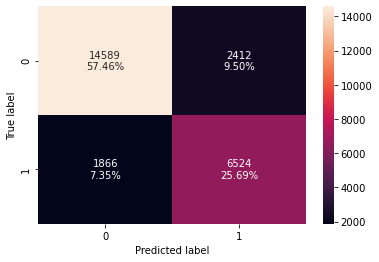

In [80]:
# let's now see how the model performs using the confusion matrix and the metrics
# creating confusion matrix on training data
confusion_matrix_statsmodels(best_model, x_train7, y_train)

# checking metric performance on training data
model_performance_classification_statsmodels(best_model, x_train7, y_train)

Recall has definitely improved by about 10% over the pre-pruning process. Lets try it out on test data

Accuracy    Recall  Precision        F1
0  0.828999  0.775329    0.71572  0.744333

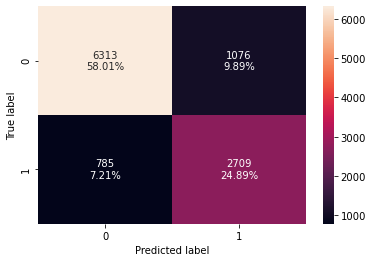

In [81]:
# creating confusion matrix on training data
confusion_matrix_statsmodels(best_model, x_test7, y_test)

# checking metric performance on testing data
model_performance_classification_statsmodels(best_model, x_test7, y_test)

The model is performing well on the testing data as well. Let's visualize the tree now

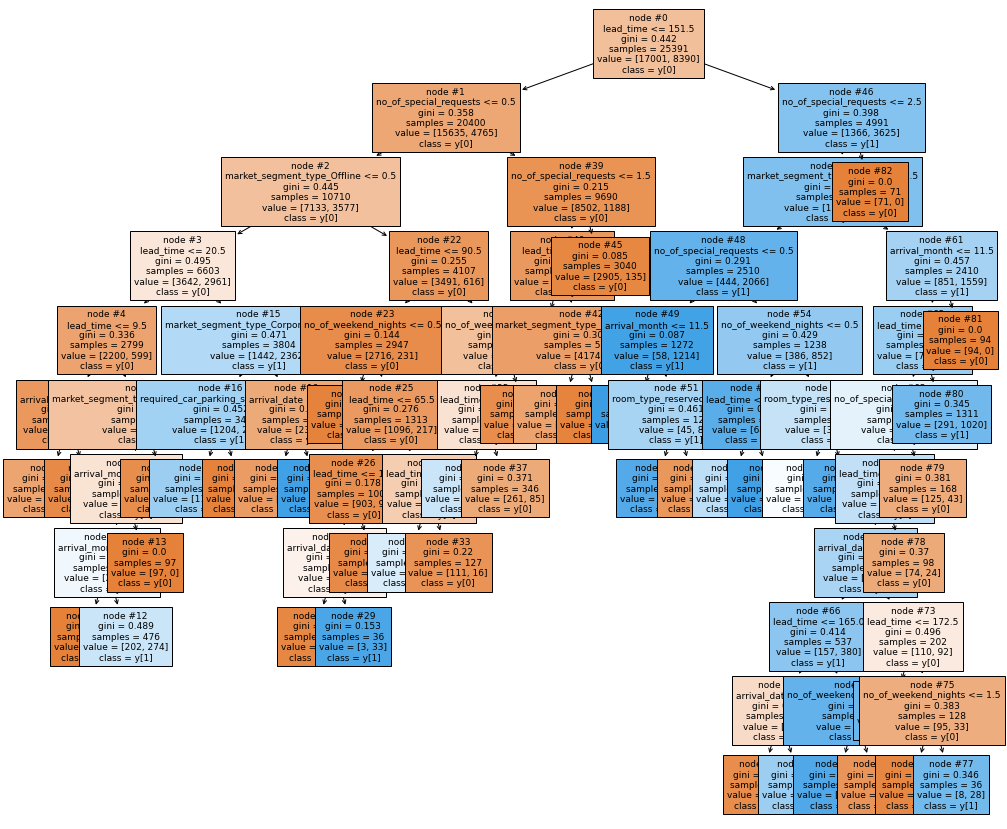

In [82]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=list(x_train7.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [83]:
# let's look at the importance of each of the variables in the best model
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train7.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
lead_time                      0.593870
no_of_special_requests         0.140461
market_segment_type_Offline    0.112531
arrival_month                  0.041020
no_of_weekend_nights           0.028652
market_segment_type_Corporate  0.027466
arrival_date                   0.020306
room_type_reserved             0.012951
no_of_week_nights              0.011600
required_car_parking_space     0.011142
no_of_children                 0.000000
repeated_guest                 0.000000
no_of_previous_cancellations   0.000000


Lead time continues to be the most important variable by a large margin even with a post-pruning process.

## Model Performance Comparison and Conclusions

Since we have decided that Recall is the most important metric for evaluating the data, let us directly compare the Recall of the logistic regression and decision tree models.

In [84]:
# print out logistic regression final model
print(model_performance_classification_statsmodels(lg7, x_test7, y_test, threshold=optimal_threshold_auc_roc))

# checking metric performance on decision tree model
print(model_performance_classification_statsmodels(best_model, x_test7, y_test))

   Accuracy    Recall  Precision        F1
0  0.766425  0.774757   0.606679  0.680493
   Accuracy    Recall  Precision        F1
0  0.828999  0.775329    0.71572  0.744333


We can see that the recall performs equally as well on the decision tree model. But on other metrics, the decision tree model is performing at a much higher level. We can use the decision tree model going forward with all new data that to correctly predict, 77% of the time, which bookings will end up being cancelled.

When using the decision tree model, the lead time for the booking it by far the most important factor in deciding the outcome of the booking. The number of special requests and the offline market segment are also key indicators for which bookings have the highest possibility of being cancelled.

The post-pruned tree using the highest effective alpha on the testing data turned out to be the best model to get the highest level of Recall we could achieve.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

- Children are not a common on the bookings for this hotel chain. From an advertising perspective, I would shift the the advertising to solely target for adult usage, rather than family usage (no children vs children). Market themselves as an adult friendly hotel.
- Over 90% only wanted breakfast or no meals. The hotel should not waste money on other meals that such a small percentage of guests want. By cutting out two extra food services, you can cut down on labor costs and food costs.
- Weekend nights had no effect on the price of the room. Weekends are inherently more traveled days so a dynamic pricing model for weekend vs weekday prices may need to be implemented to raise revenue.
- When a customer has a lead time of less than 151.5 days for the booking, it greatly increases the chances of a cancellation
- When a customer has more than .5 special requests, it greatly decreases the chances of the booking being cancelled
- When a market segment type is offline, it greatly decreases the chances of the bookings being cancelled

- There would seem to be some policies that the hotel could impliment in terms of lead time, cancellations and refunds. The hotel needs to come up with a sort of 30/60/90/120 day policy that would get you certain refund percentages back that would yield at least some revenue to be recovered in the case of a cancellation and to deter cancellations from happening in the first place. This could be combined into some sort of formula with if a special request was made and you cancelled, the refund % would go down back to the customer. 